# **LOAN DEFAULT PREDICTION**

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Importing the necessary libraries**

In [154]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Importing libraries for scaling the data
from sklearn.preprocessing import StandardScaler

# Importing libraries to split our data into train and test sets. 
from sklearn.model_selection import train_test_split

# Importing libraries for classification
from sklearn.linear_model import LogisticRegression

# Importing libraries for performance evaluation of different models
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

# Importing libraries for tree based models and decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importing libraries for ensemble models and bagging, random forest classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing libraries for scientific python - statistical functions
import scipy.stats as stats

# Import libraries for finding optimal parameter value
from sklearn.model_selection import GridSearchCV

# To impute missing values using MICE algorithm in data_orig dataframe
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

from statsmodels.stats.outliers_influence import variance_inflation_factor

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')



### **Reading the dataset**

In [81]:
hm=pd.read_csv("hmeq.csv")

In [82]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [83]:
# Display first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [84]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [85]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights**

* The dataset contains 5960 rows and 13 columns

### **Check the data types of the columns**

In [86]:
# Check info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**

* Data is missing for some features. However, 'BAD' and 'LOAN' columns have no missing rows.
* Columns 'REASON' and 'JOB' have string data, rest all are numeric data types.

In [87]:
data.duplicated().sum()

0

None of the rows contain duplicate data.

### **Check for missing values**

In [88]:
# Analyse missing values - 
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [89]:
# Check the percentage of missing values in the each column.
# Dividing the result from the previous code by the number of rows in the dataset
percent_nan = (((data.isnull().sum())/len(data))*100).sort_values(ascending=False)

percent_nan

DEBTINC    21.258389
DEROG      11.879195
DELINQ      9.731544
MORTDUE     8.691275
YOJ         8.640940
NINQ        8.557047
CLAGE       5.167785
JOB         4.681208
REASON      4.228188
CLNO        3.724832
VALUE       1.879195
BAD         0.000000
LOAN        0.000000
dtype: float64

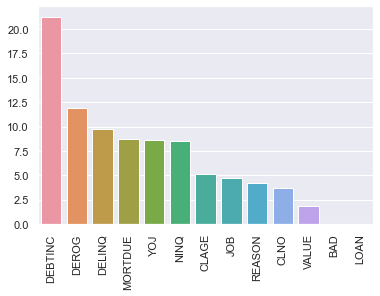

In [90]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

**Insights**

1. The 'Debt to Income Ratio' feature is missing around 21% values (1267 entries), followed by 'No of derogatory reports' with ~12% missing values (708 entries).

2. 'BAD' and 'LOAN' features have no missing data.

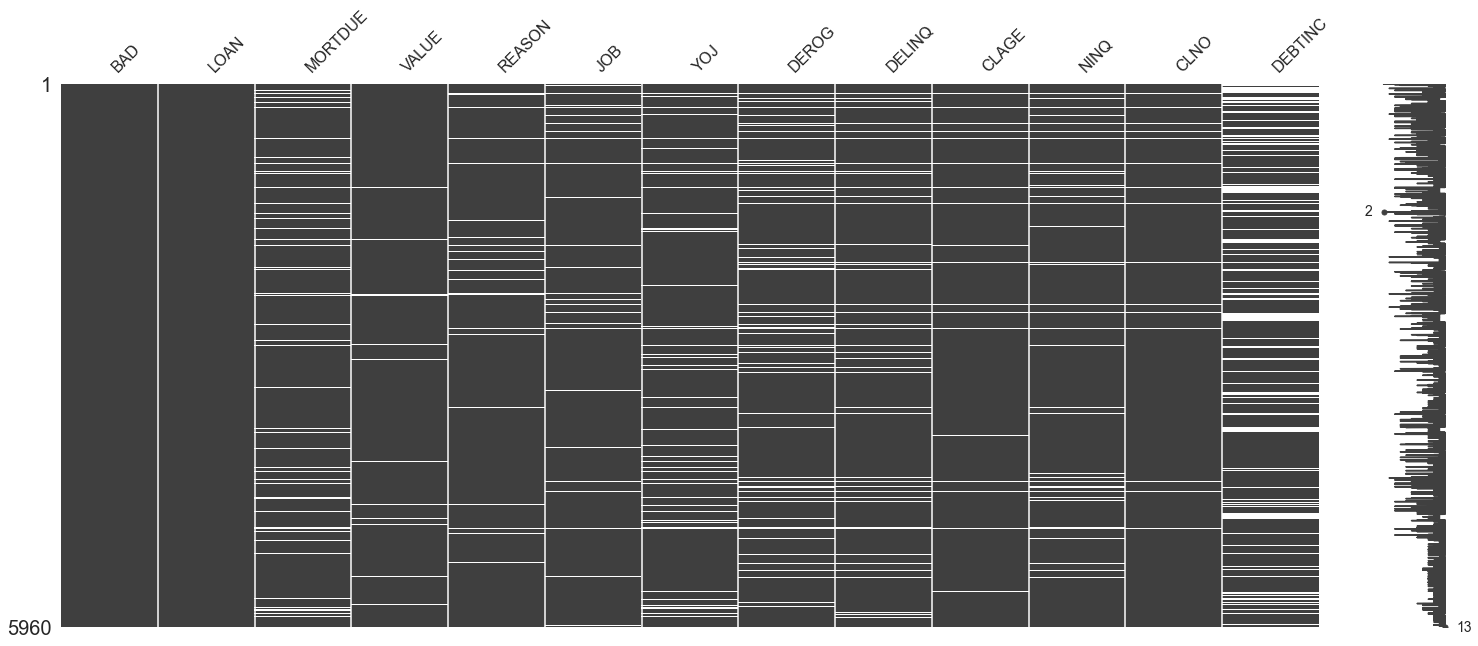

In [91]:
#Let's also visualize the missing entries in the dataframe
import missingno as msno
msno.matrix(data);

**Insights**

1. There are many rows with data missing in several fields across the row, hence these rows may be dropped as there is not much information loss associated with the. We will explore this further.

2. 'BAD' and 'LOAN' features have no missing data.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

#### Are there rows which can be dropped ?

In [92]:
#Exclude columns that are missing no data. Are there common rows that are missing from all the remaining columns ?
col_missing_data=data.columns.drop(labels=['BAD','LOAN'])
data[data.loc[:,col_missing_data].isnull().all(axis=1)]


BAD   LOAN  MORTDUE  VALUE REASON  JOB  YOJ  DEROG  DELINQ  CLAGE  NINQ  \
3       1   1500      NaN    NaN    NaN  NaN  NaN    NaN     NaN    NaN   NaN   
1405    0  10800      NaN    NaN    NaN  NaN  NaN    NaN     NaN    NaN   NaN   

      CLNO  DEBTINC  
3      NaN      NaN  
1405   NaN      NaN

**Insights**
* These rows can be dropped as there is not much information loss associated with dropping them.

In [93]:
#Dataframe with dropped rows
df1=data.drop(index=[3,1405],axis=0)

In [94]:
df1.shape

(5958, 13)

**Can we find out some trend in missing data, prima facie ?**

In [95]:
# In the first five rows, four out of five loans were BAD and all rows were missing DEBTINC ratio, 
# is there a relationship between loans being bad and debt to income ratios missing ?
# Let us see

data[(data['BAD']==1) & (data['DEBTINC'].isna())]



BAD   LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
0       1   1100   25860.0   39025.0  HomeImp    Other  10.5    0.0     0.0   
1       1   1300   70053.0   68400.0  HomeImp    Other   7.0    0.0     2.0   
2       1   1500   13500.0   16700.0  HomeImp    Other   4.0    0.0     0.0   
3       1   1500       NaN       NaN      NaN      NaN   NaN    NaN     NaN   
6       1   1800   48649.0   57037.0  HomeImp    Other   5.0    3.0     2.0   
...   ...    ...       ...       ...      ...      ...   ...    ...     ...   
5900    1  61400   46126.0   83800.0      NaN    Other  33.0    0.0     1.0   
5904    1  63300  202000.0  281000.0  DebtCon  ProfExe   2.0    0.0     0.0   
5930    1  72300       NaN   85000.0  DebtCon    Other   1.0    0.0     0.0   
5932    1  76500   38206.0   90000.0  DebtCon    Other  12.0    0.0     0.0   
5933    1  77200   83962.0  215000.0  HomeImp     Self   8.0    1.0     2.0   

           CLAGE  NINQ  CLNO  DEBTINC  
0      94.366667   1.0   9.0      NaN  
1     121.833333   0.0  14.0      NaN  
2     149.466667   1.0  10.0      NaN  
3            NaN   NaN   NaN      NaN  
6      77.100000   1.0  17.0      NaN  
...          ...   ...   ...      ...  
5900  339.900000   1.0  23.0      NaN  
5904   99.433333   2.0  21.0      NaN  
5930  117.166667   9.0  23.0      NaN  
5932  134.900000   0.0  26.0      NaN  
5933   71.533132   3.0  14.0      NaN  

[786 rows x 13 columns]

* 786 out of 1267 rows missing DEBTINC ratio, are of defaulters. (62%) . This might be a case of MNAR (Missing Not at random), in which case binary flags for missing data shall show a relationship with target variable. We shall explore this further.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [96]:
# Make a list of all 'object' type columns in data
cat_cols = data.select_dtypes(['object']).columns.tolist()

#add target variable to this list as this is a classification problem and the target variable is categorical
cat_cols.append('BAD')

In [97]:
cat_cols

['REASON', 'JOB', 'BAD']

In [98]:
# Changing the data type from 'object' to 'category' as it is memory efficient.

for i in cat_cols:
    data[i] = data[i].astype('category')

# Create a copy of data
data_replica=data.copy()

In [99]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [100]:
# Analyze the summary statistics for numerical variables
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**

* The range of home equity loan amounts being sanctioned is huge. An amount as low as approx 1k dollars and as high as ~90k dollars has been approved. The **mean amount of loan approved** stands at around **20k dollars**. 
* Average mortgage due on existing home loans is ~75k. However, it has gone as high as ~400k (outliers). 
* Home properties' current value ranges from 8k to ~850k which indicates that many lavish properties use home equity financing.
* The **average job experience** of borrowers on current job is **~9 years** with a maximum of 41 years. It seems that people with no experience at current job have also been granted loans and people from varied job experience levels have resorted to home equity as a financing option. 
* No of derogatory reports raised on a borrower for late payment/serious delinquency have seen a maximum of 10, which is rare, as mean is around 0.
* Similarly, no of delinquency reports raised for an individual have been as high as 15, with mean of 0! 
* Age of the **oldest credit line** for the borrower, on an average, is around 180 months (15 years). People running a credit line as old as **~97 years** has been recorded in the data, which seems **bizarre**.
* 1 enquiry per person is observed on an average. However, 17 enquiries have also been recorded which is interesting.
* An average person has 21 credit lines up & running. However, people have ~71 credit lines as well, which seems to be too high.
* Debt Income ratio on an average is ~34, which is acceptable. But the value of ~203 is wierd; it will be interesting to explore such observations further.

In [101]:
# Check summary for categorical data - 

data.describe(include='category').T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**

* The number of **non-defaulting/good clients(80%) far exceed the defaulting ones(20%)**, which is a must for a flourishing banking business .
* **Debt Consolidation** is the major reason for which home equity loans are being taken by clients.
* The job of borrowers are of 6 different types, out of which 'Other' is the response recorded for most of the borrowers.


**Let's look at the unique values in all the categorical variables**

In [102]:
# Checking the count of unique values in each categorical column 

cat_cols= data.select_dtypes(['category'])

for i in cat_cols.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights**

* The majority of loans(~80%) are running fine and are in 'non-defaulting' category.

* The prominent reason for taking a home-equity loan is debt consolidation(~69%) which is followed by Home Improvement(31%).

* Clients with different kinds of professional backgrounds approach banks for loans. In our case, 6 types of jobs of borrowers have been recorded, out of which 'Other' category is the most common(42%), followed by Professional Executives(~22%) and so on


### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [103]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(12,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print('Skew:',round(feature.skew(),2))
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='cyan') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="pastel") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    #ax_box2.annotate(np.median(feature), (np.median(feature),-1),size=12)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.nanmedian(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

Skew: 2.02


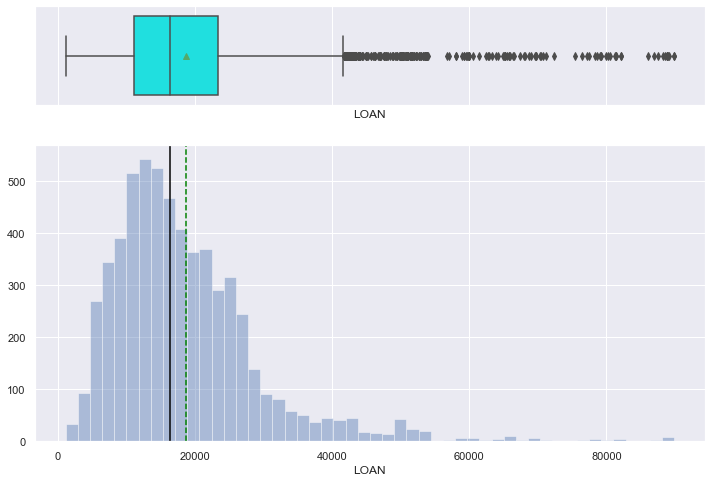

In [104]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights**
1. The average loan amount approved for clients is ~18k and the median value of loan amounts sanctioned is ~16k
2. The data is right skewed. There are many outliers and some loan amounts sanctioned are even greater than 80k.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

Skew: 1.81


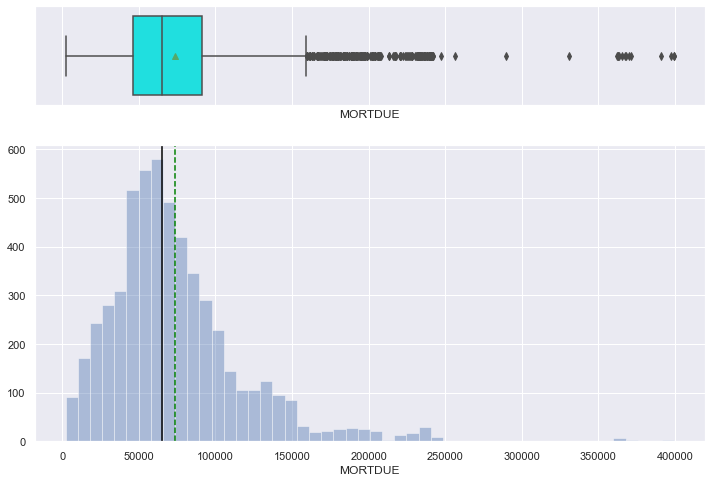

In [105]:
# Build the histogram boxplot for Mortgage due
histogram_boxplot(data['MORTDUE'])


**Insights**

1. The distribution of Mortgage Due is right skewed and there are a few clients whose existing mortgage is even above $350k.

Skew: 3.05


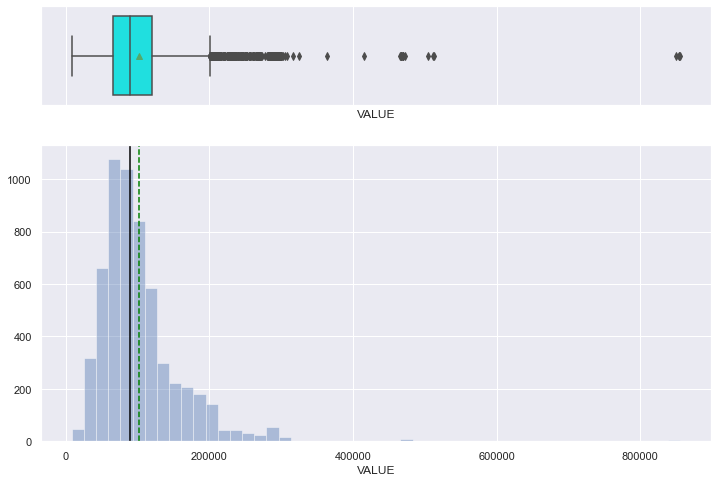

In [106]:
# Build the histogram boxplot for Current Value of the property

histogram_boxplot(data['VALUE'])

**Insights**

1. The distribution of current value of property is right skewed and there are few clients whose property value is even more than $400k.

Skew: 0.99


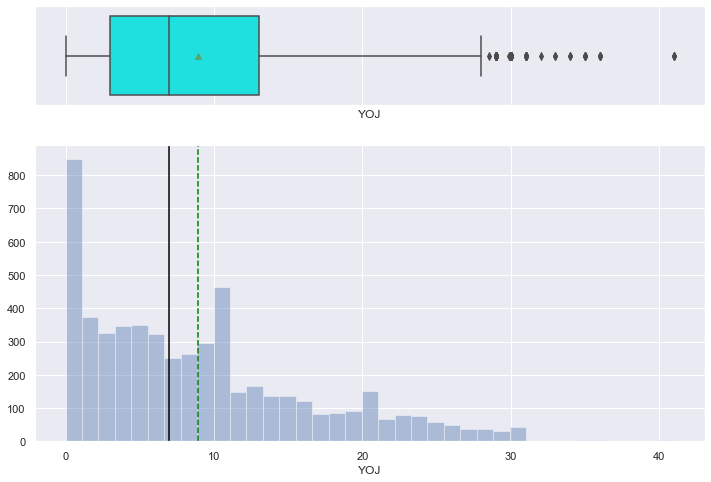

In [107]:
# Build the histogram boxplot for Client's experience on current job

histogram_boxplot(data['YOJ'])

**Insights**

1. The distribution of years spent on current job is right skewed and there are a few clients whose experience on current job is even greater than 30 years.
2. Maximum number of people have around 0-1 year experience on the current job.

Skew: 5.32


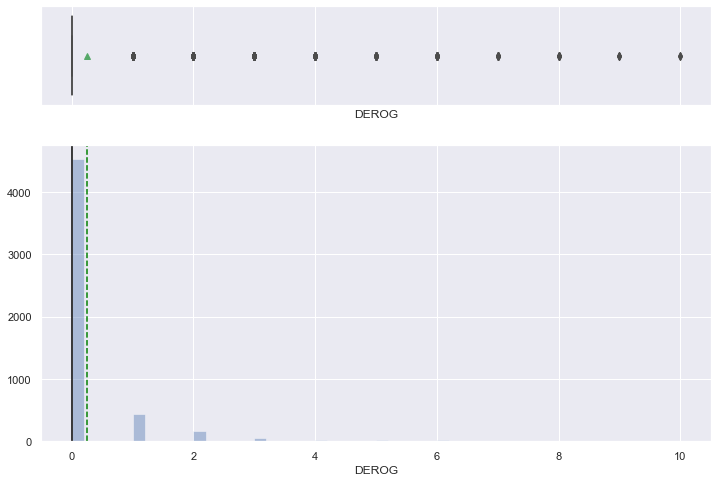

In [108]:
# Build the histogram boxplot for the no of derogatory reports raised against clients

histogram_boxplot(data['DEROG'])

**Insights**

1. The distribution of no of derogatory reports raised against a client is highly right skewed with outliers on the right side. 
2. A vast majority of people have no derogatory reports raised against them. However, as many as 10 reports have also been raised against a few borrowers.
3. More than 4000 people have nil derogatory reports raised against them. It is not 'Kaliyug' yet. **:D**

Skew: 4.02


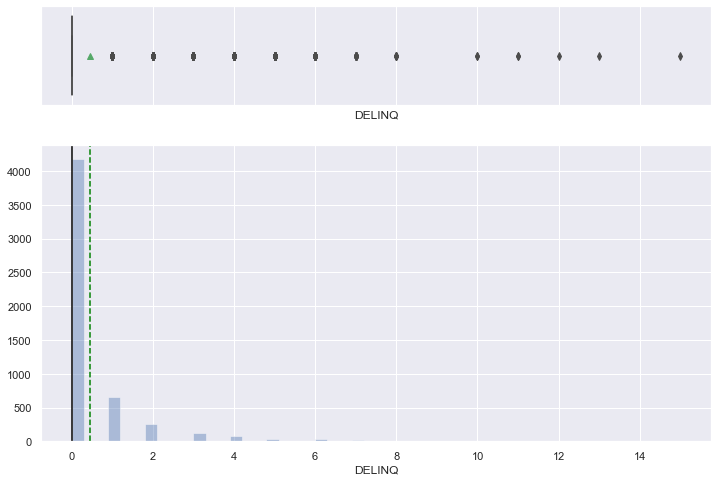

In [109]:
# Build the histogram boxplot for the number of Delinquency reports raised against a borrower
histogram_boxplot(data['DELINQ'])

**Insights**

1. The distribution of no of delinquency reports raised against borrowers is very similar to the previous distribution for derogatory reports. It is also highly right skewed with outliers on the right. It is evident that for a few borrowers, it has even reached 15.

Skew: 1.34


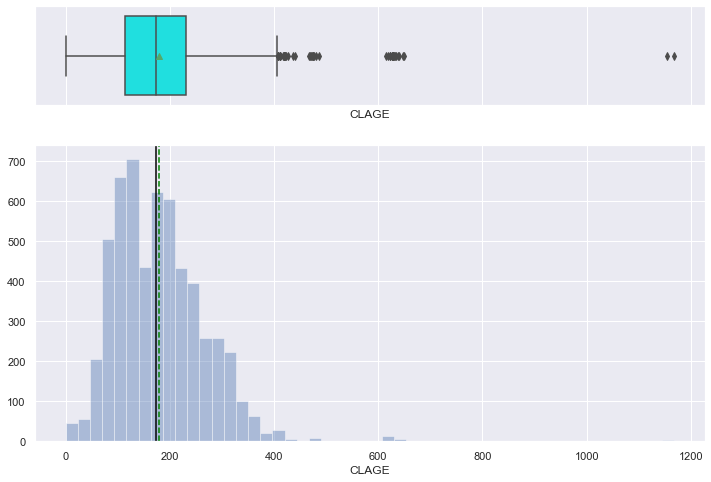

In [110]:
# Build the histogram boxplot for the distribution of the lifespan(age) of the oldest credit line across clients
histogram_boxplot(data['CLAGE'])

**Insights**

1. The distribution of the age of oldest running credit line is slightly right skewed. Credit lines running since last 97 years have also been recorded, which seems to be an error in data collection.
2. Excluding outliers, the range of values for age of oldest running credit line is from 0 to 33 years.

Skew: 2.62


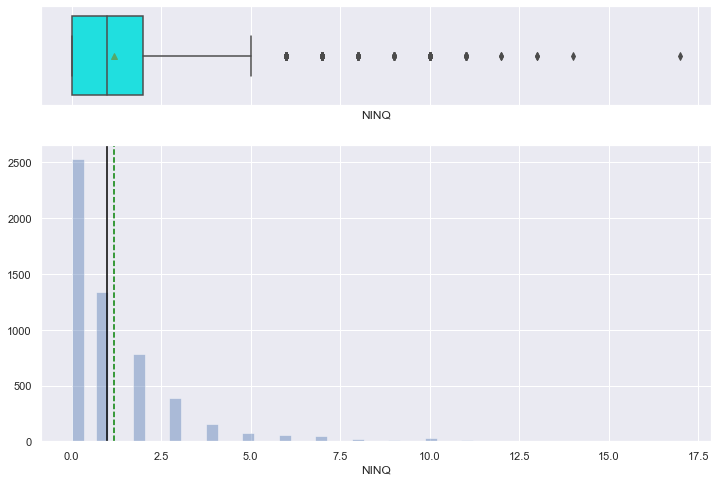

In [111]:
# Build the histogram boxplot for the number of recent credit enquiries for clients
histogram_boxplot(data['NINQ'])

**Insights**

1. The distribution of no of recent credit enquiries of borrowers is highly right skewed.
2. Even more than 16 enquiries have been made against a few borrowers. 
3. 25% borrowers have no recent credit enquiries.

Skew: 0.78


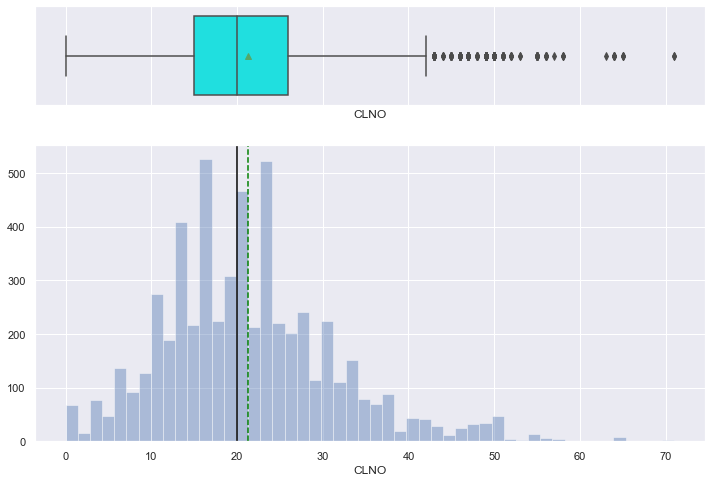

In [112]:
# Build the histogram boxplot for number of exisiting credit lines
histogram_boxplot(data['CLNO'])

**Insights**

1. The distribution of no of existing credit lines of a client is slightly right skewed.
2. There are a few clients who have more than 70 credit lines up and running which is rare.

Skew: 2.85


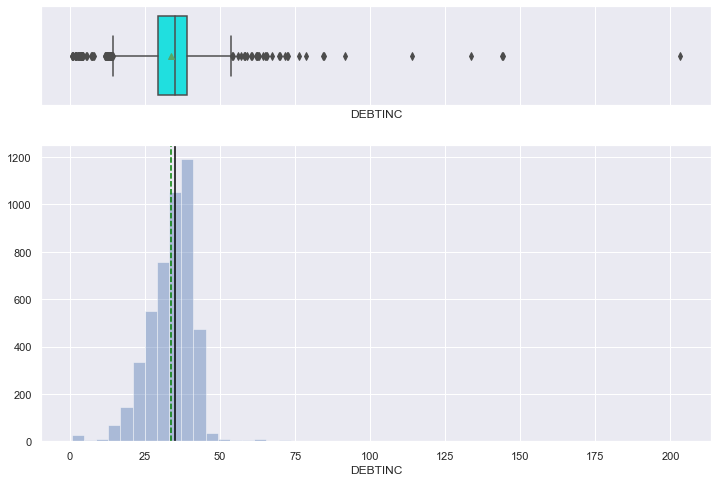

In [113]:
# Build the histogram boxplot for Debt to Income Ratio

histogram_boxplot(data['DEBTINC'])

**Insights**

1. The distribution of Debt to Income ratio of a client is left skewed, most clients have DTI < 34.
2. The average DTI ratio is ~34. However, for a few borrowers, a DTI value of over 100 has also been recorded, which indicates that the gross monthly repayments for these clients exceed monthly earnings. It is highly likely that such customers will turn into defaulters. Let us have a look in the next cell.
3. If we exclude outliers, the DebtInc ratio ranges from around 12 to 50.

**Value of DebtInc ratio >100, seems impractical. Who can sustain debts more than the earnings ? Let us find out**

In [114]:
data[data['DEBTINC']>100]

BAD   LOAN   MORTDUE     VALUE   REASON      JOB  YOJ  DEROG  DELINQ  \
3910   1  20500  113963.0  131135.0  HomeImp     Self  3.0    1.0     0.0   
4423   1  23000   58577.0   69327.0      NaN    Other  4.0    0.0     2.0   
4473   1  23300  103783.0  132612.0  DebtCon    Sales  1.0    0.0     NaN   
5599   1  37300   68789.0   86172.0  HomeImp     Self  2.0    0.0     6.0   
5912   1  65500  205156.0  290239.0  DebtCon  ProfExe  2.0    0.0     0.0   

           CLAGE  NINQ  CLNO     DEBTINC  
3910  243.680604   1.0  26.0  143.949605  
4423  110.414480   2.0  33.0  133.528270  
4473  120.347967   0.0  19.0  203.312149  
5599  235.637906   2.0  25.0  114.050528  
5912   98.808206   1.0  21.0  144.189001

**Insights**

* It can clearly be seen that all customers whose Debt to Income ratio was over 100, turned out to be defaulters, which is obvious.

### **2. Univariate Analysis - Categorical Data**

In [115]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2) - 0.2 # width of the plot
        y = p.get_y() + p.get_height() + 20          # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    #plt.show() # show the plot

#### Analyze Barplot for categorical columns

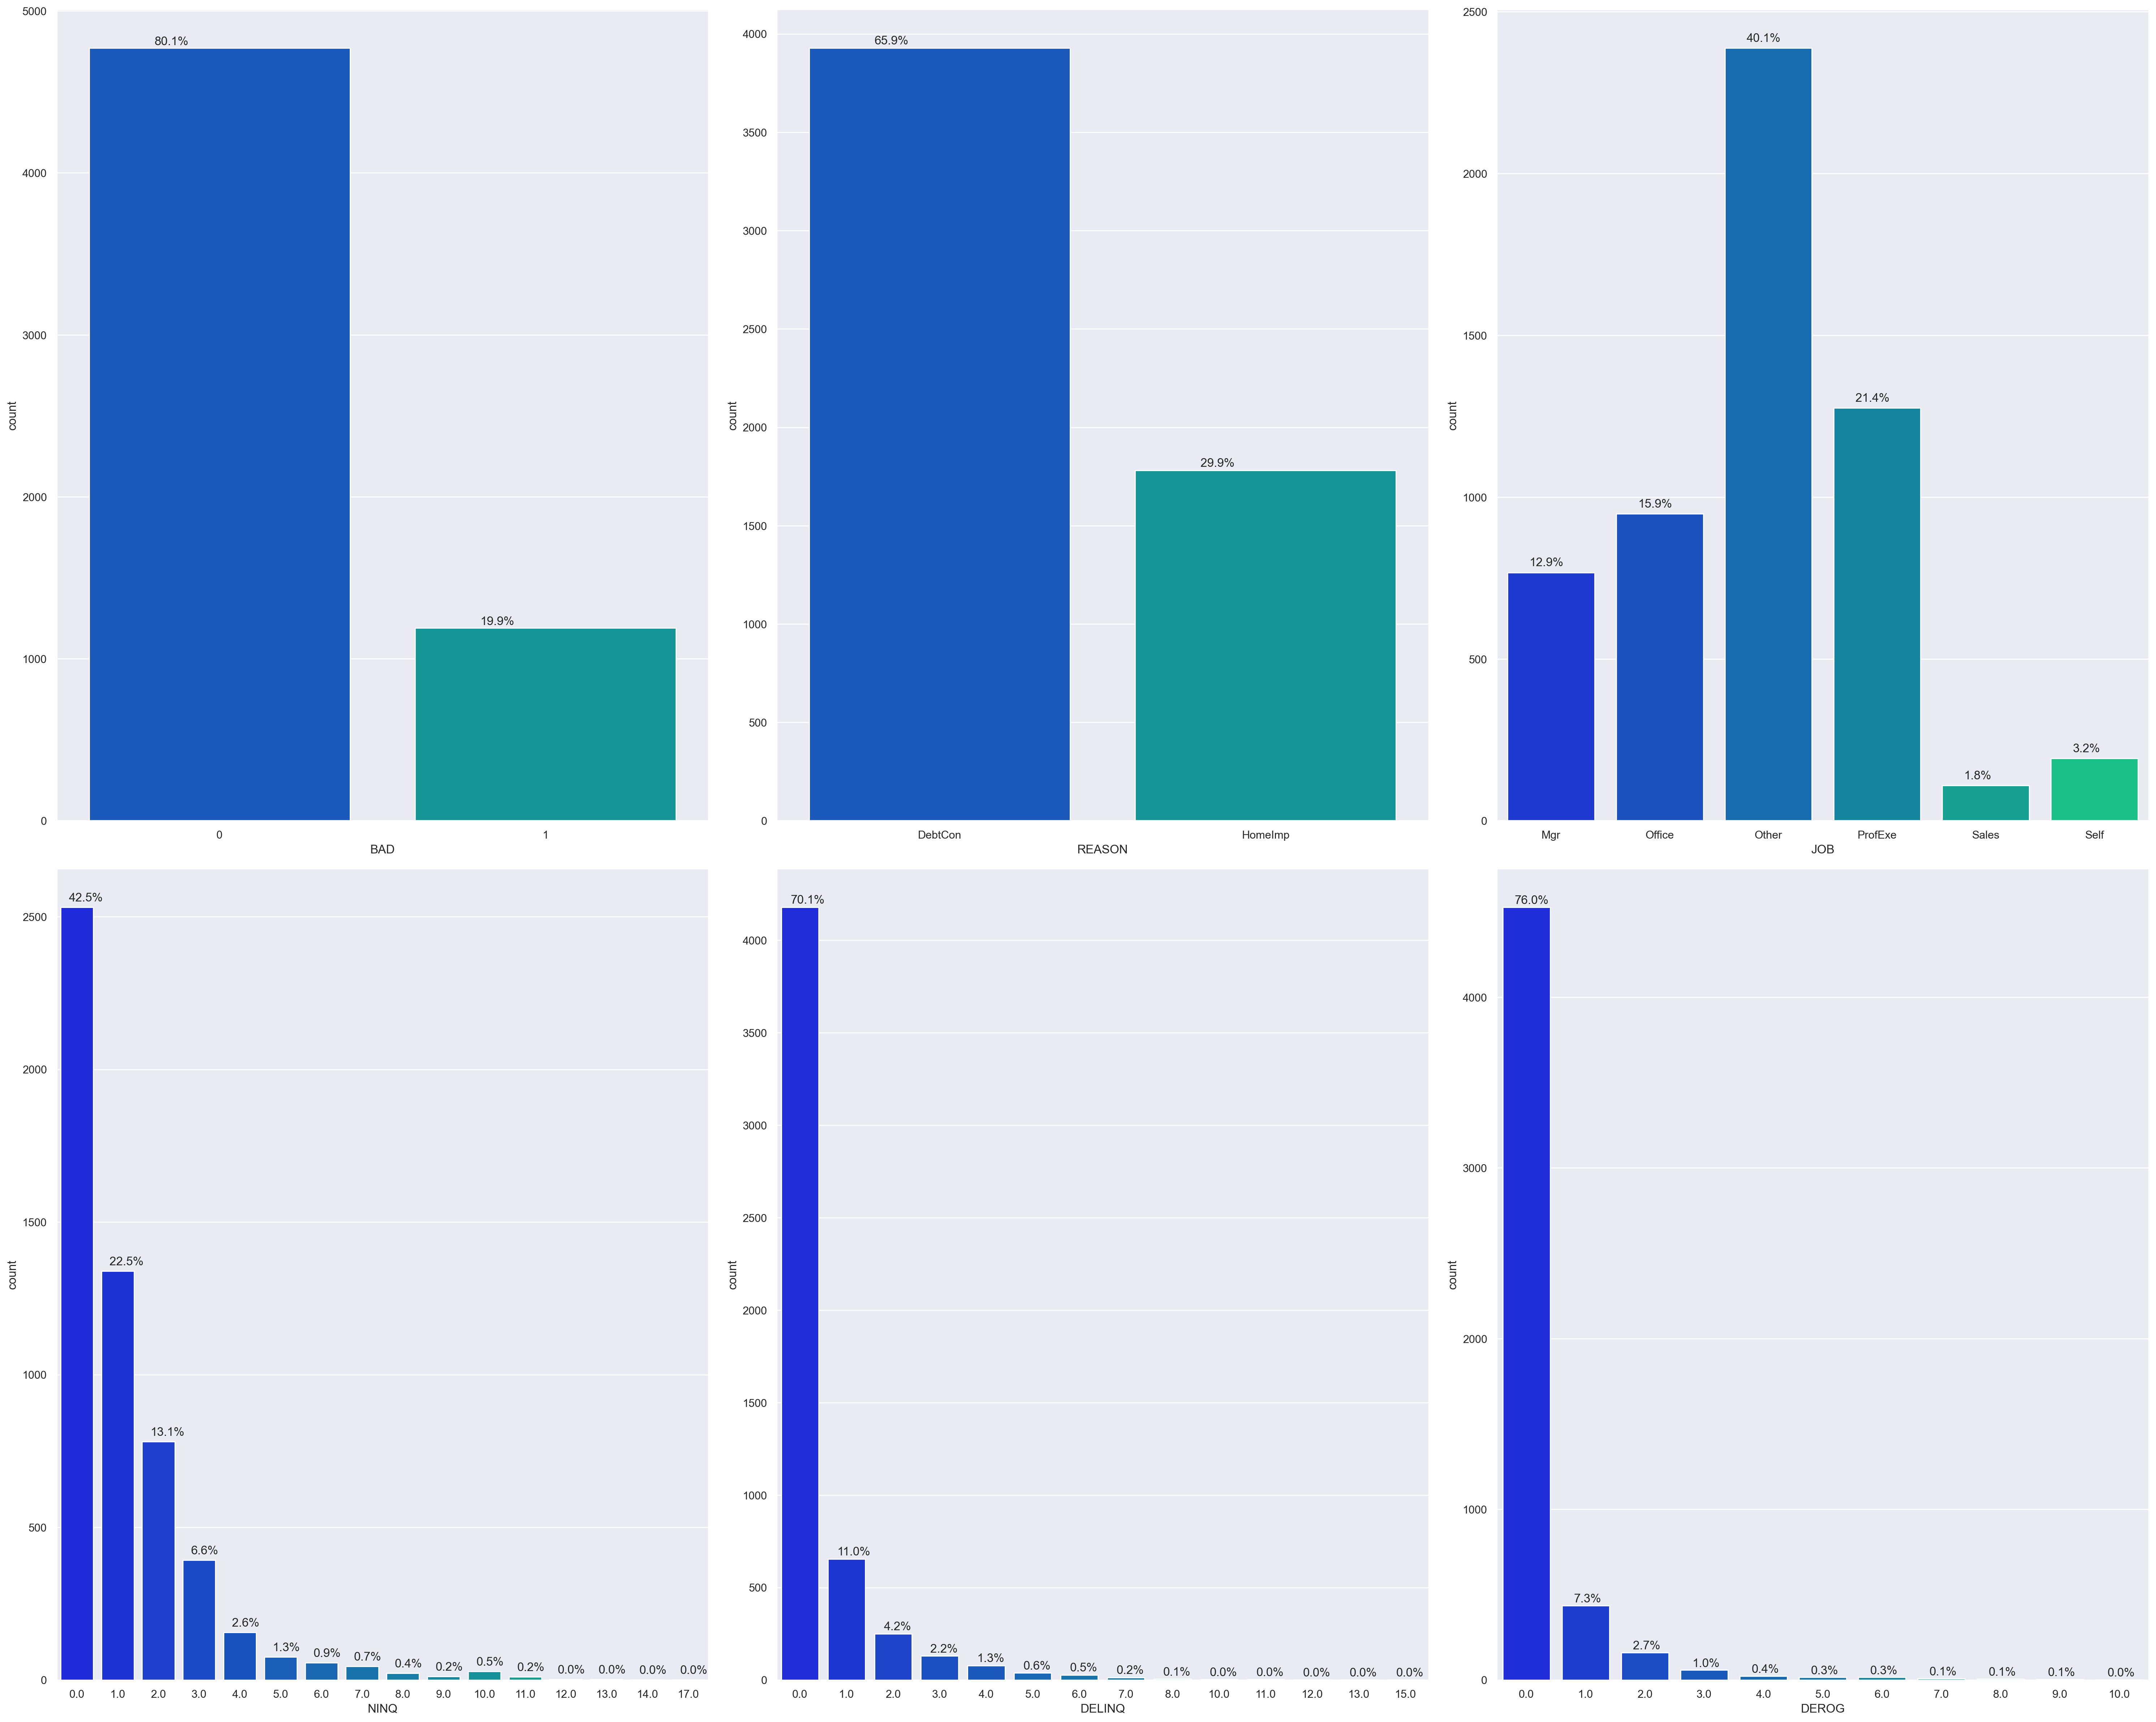

In [116]:
# Let's create all categorical plots in one go

#Create a list of categorical columns for barplot analysis
cat_cols = list(data.select_dtypes(include='category').columns)
cat_cols.extend(['NINQ','DELINQ','DEROG'])

#Define the no. of rows and columns required to plot the variables
rows = 2
cols = 3

#Define the figure object
fig = plt.figure( figsize=(cols*10, rows*12),dpi=200)

#Loop for plotting different variables at different locations inside the plot
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows,cols,i+1) #There are 6 subplots to be added (2X3)
    plot=sns.countplot(data[col], ax = ax, palette='winter') #plot categorical data
    
    perc_on_bar(plot,data[col]) #Call function to annotate percentages on bars
    
fig.tight_layout()  
plt.show()

**Insights**

1. Around 20% of disbursed loans have turned into defaults.

2. The reason for which clients prefer HEL is Debt Consolidation, which indicates that it is economical to shift to home-equity loans than other forms of credit.

3. The distribution of jobs of different clients shows that most of them reported their jobs as none of the listed categories- 'Other', followed by Professional Executives.

4. The distribution of number of recent credit enquiries is right skewed. 42.5% clients have had no credit enquiries. Further, more than 90% customers have less than 10 recent enquiries. This information can be used in treating outliers.

5. ~70% borrowers have no delinquent reports raised against them. Also, more than 90% clients have 8 or less delinquency reports in their records.

6. The distribution of no of derogatory reports is very similar to the previous distribution of number of delinquent reports. Around 76% of clients have no derogatory reports raised against them. Around 87% clients have 3 or less derogatory reports raised.


## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs continuous variables

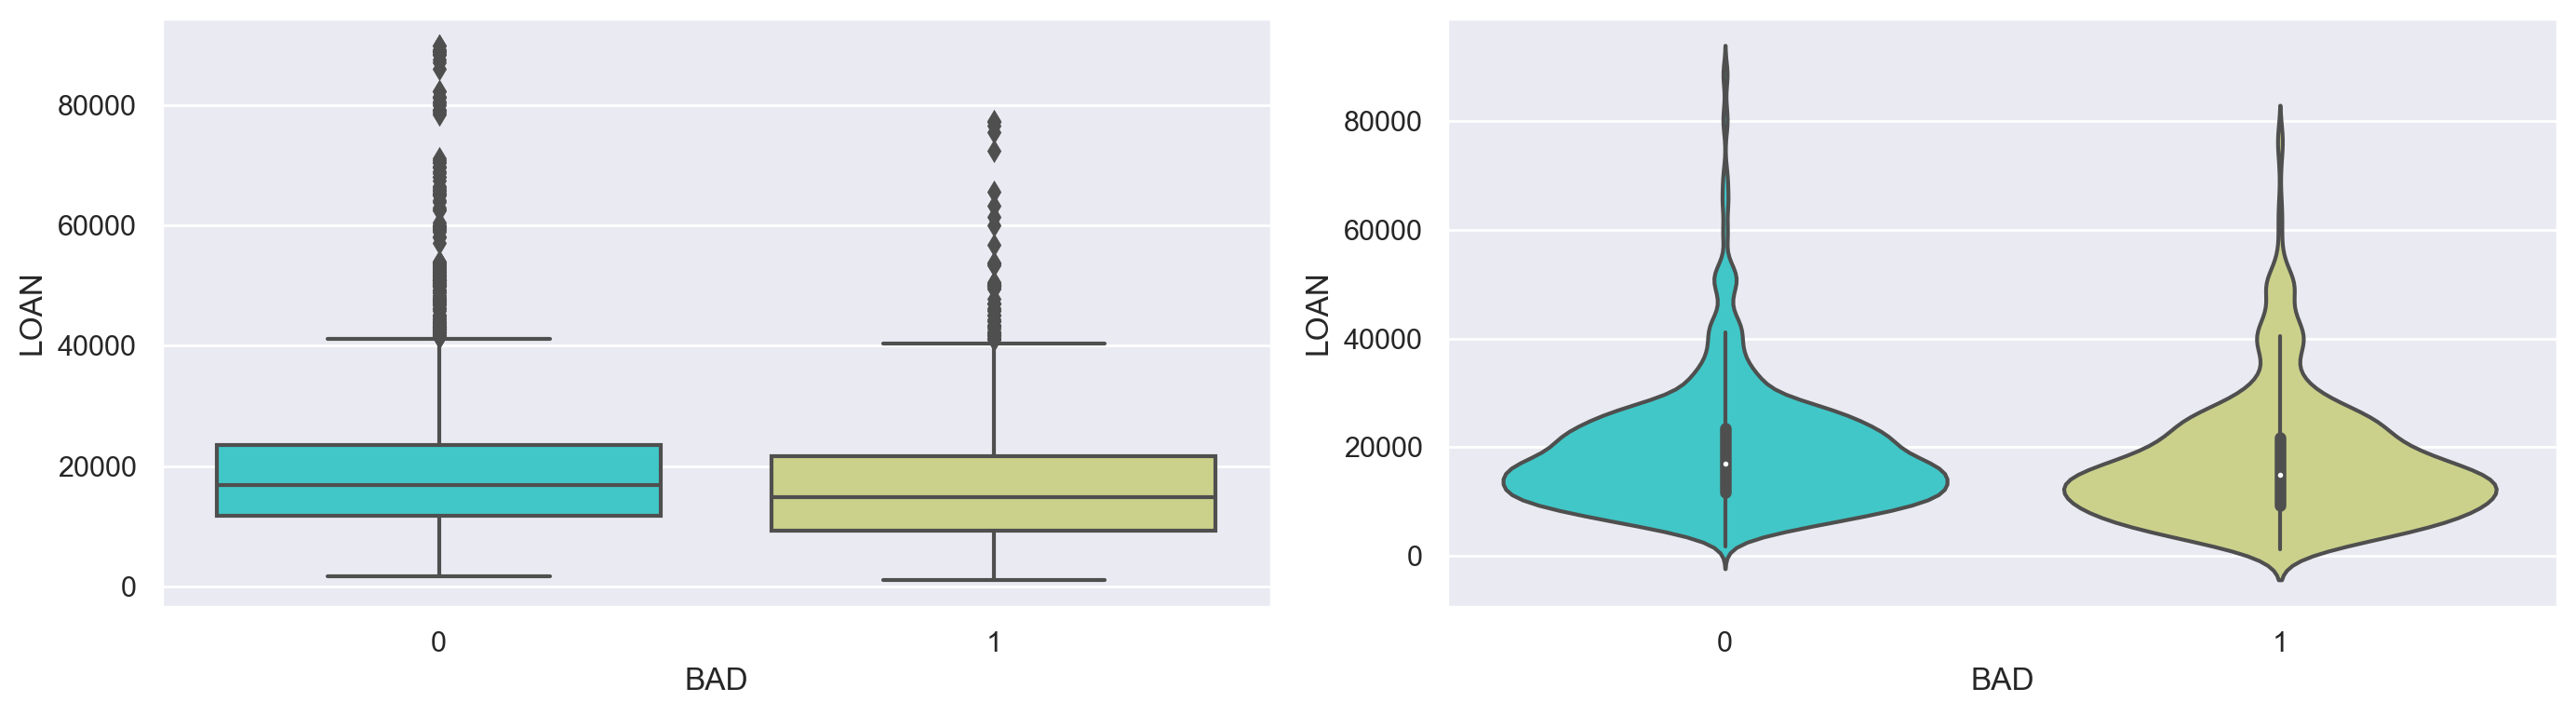

In [117]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['LOAN'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['LOAN'],palette="rainbow")
plt.tight_layout()

**Insights**

1. The median value of loan approved is lower for defaulting clients. 
2. Loan amounts greater than USD 80k have not defaulted, but are outliers. This indicates that high value loans are being approved for low-risk customers only-who do not default, which seems natural.
3. Hence, outliers also carry meaningful data which will have to be kept in mind while treating them.


#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

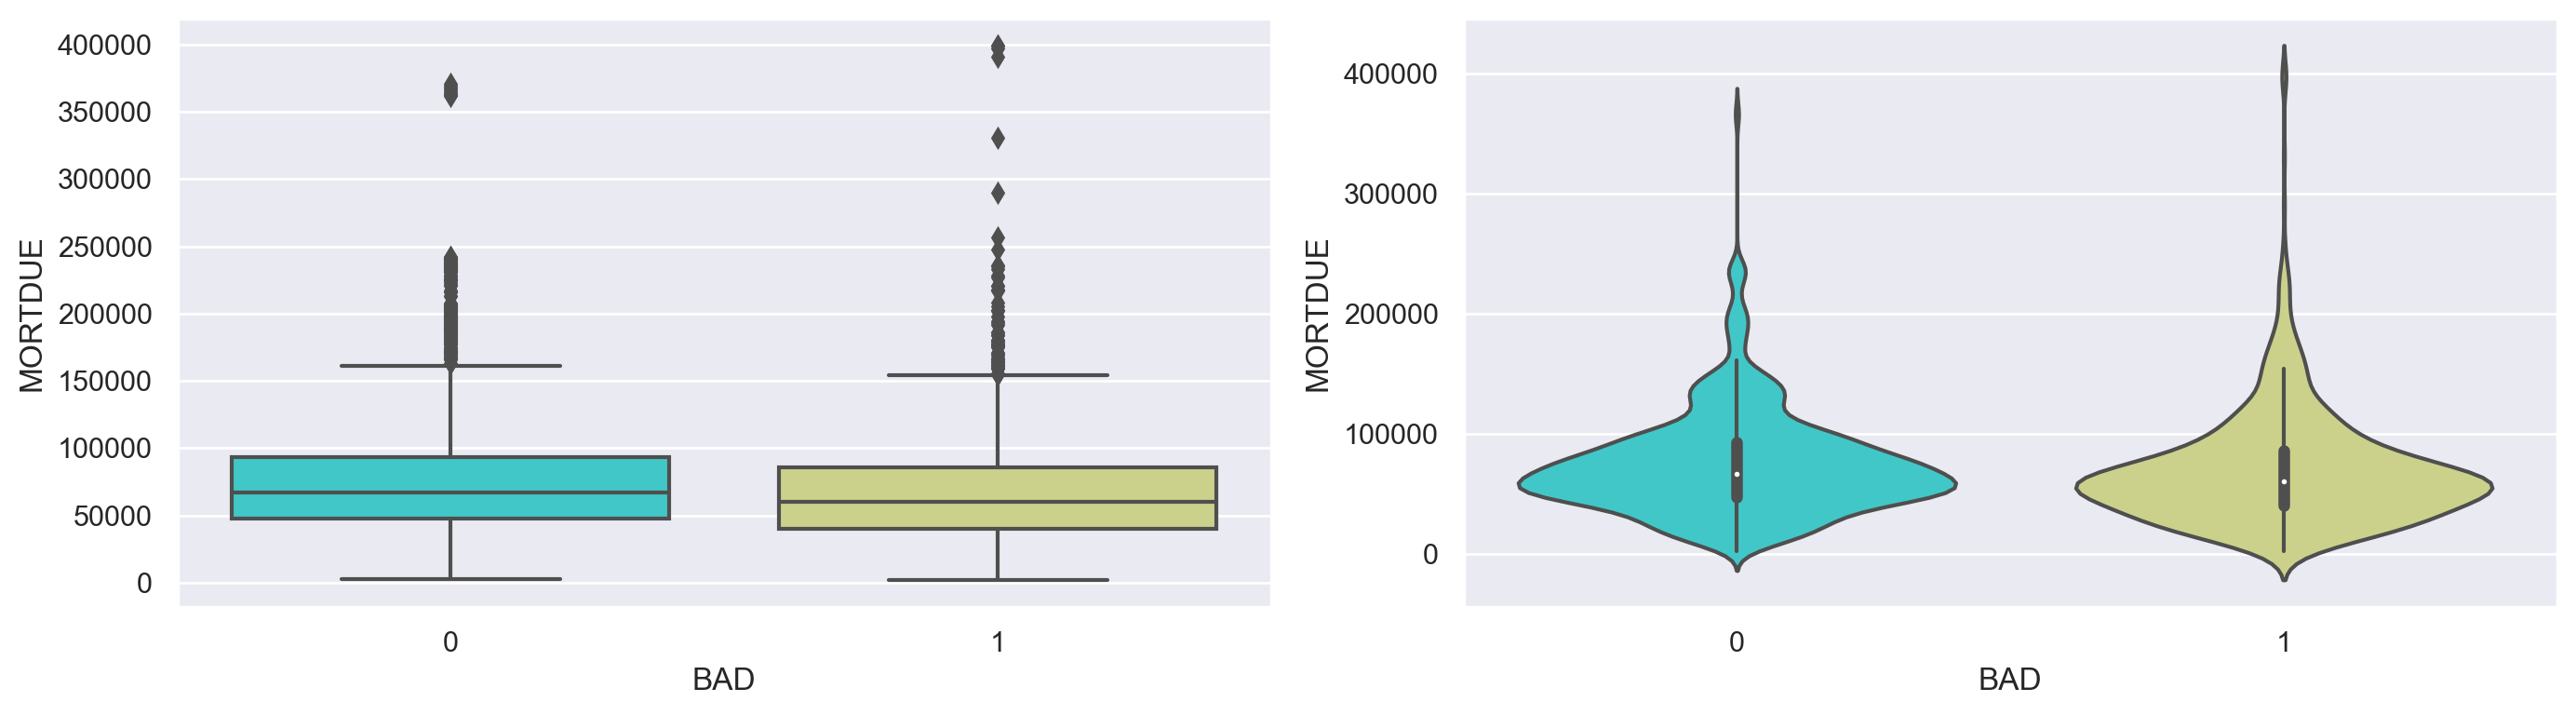

In [118]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['MORTDUE'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['MORTDUE'],palette="rainbow")
plt.tight_layout()

**Insights**

1. The median value of amount due on the existing mortgage is lower for defaulting clients. However, the due amount is ~400k for a few defaulters.
2. There are many outliers for defaulting clients w.r.t mortgage amount due. Almost all clients with Mortgage value greater than 400k have defaulted.

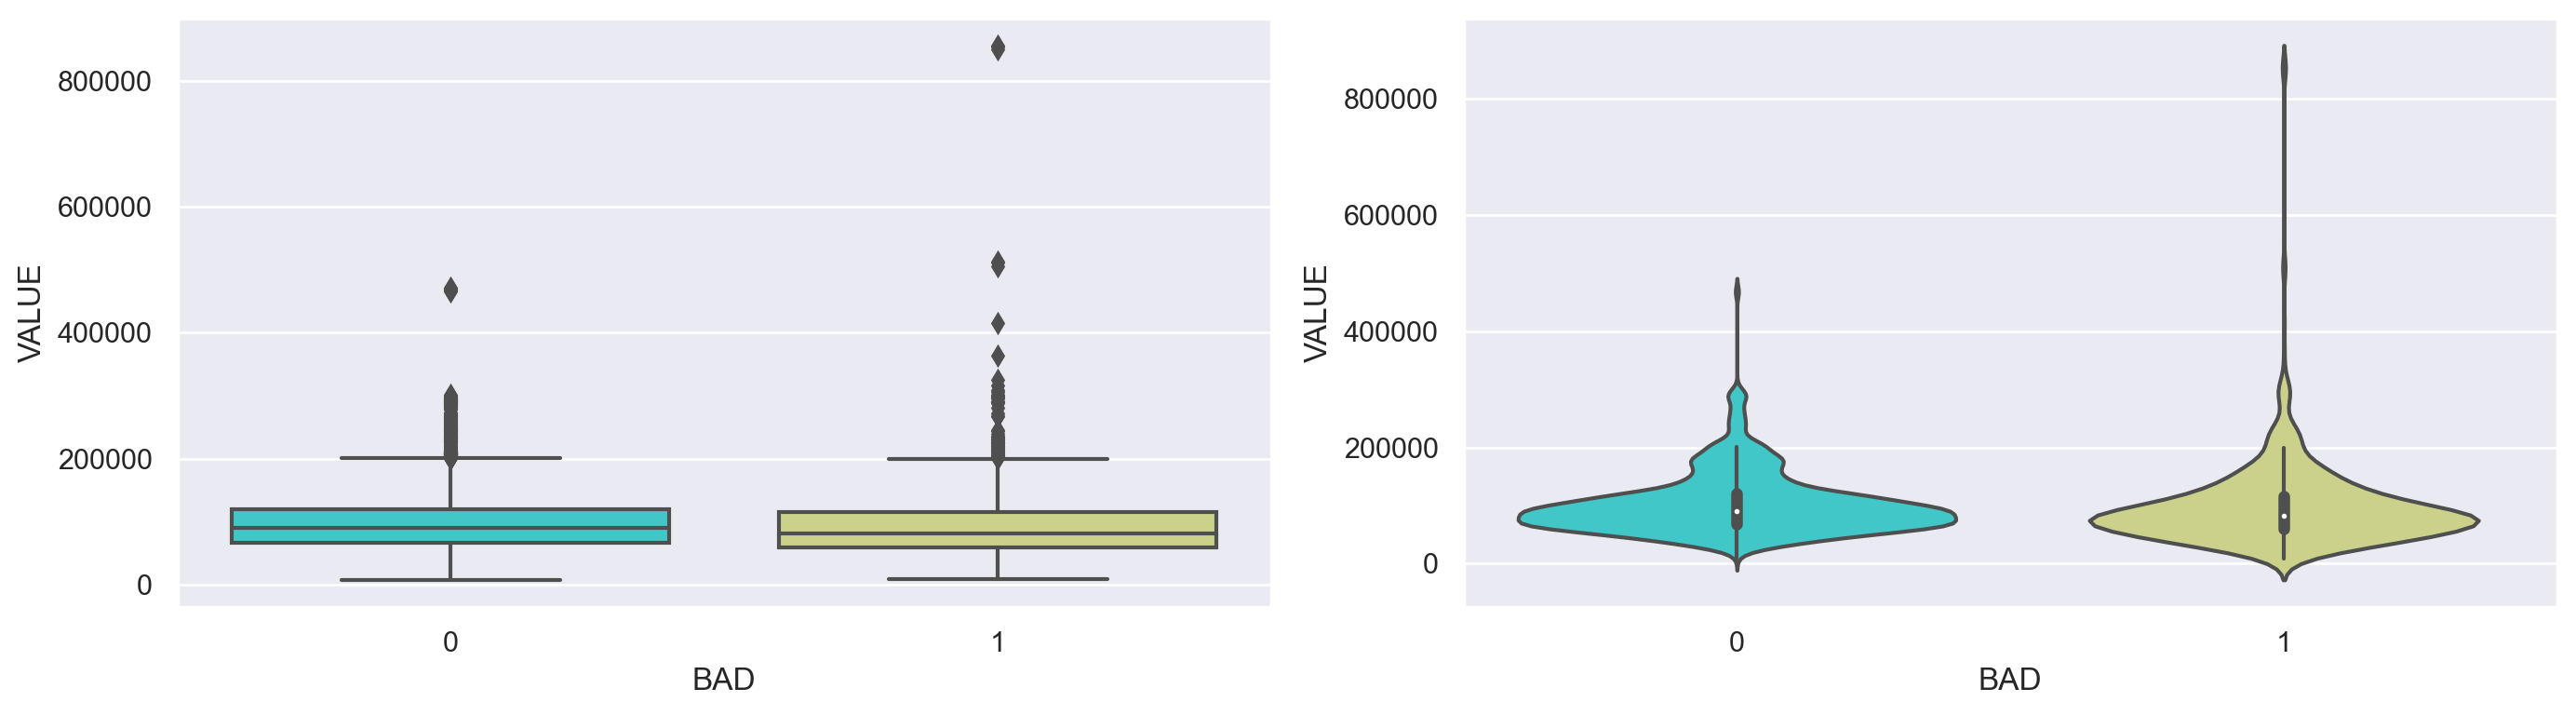

In [119]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['VALUE'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['VALUE'],palette="rainbow")
plt.tight_layout()

**Insights**
1. The median value of current value of property is lower for defaulting clients. However, the value goes as high as ~$800k for a few defaulters.

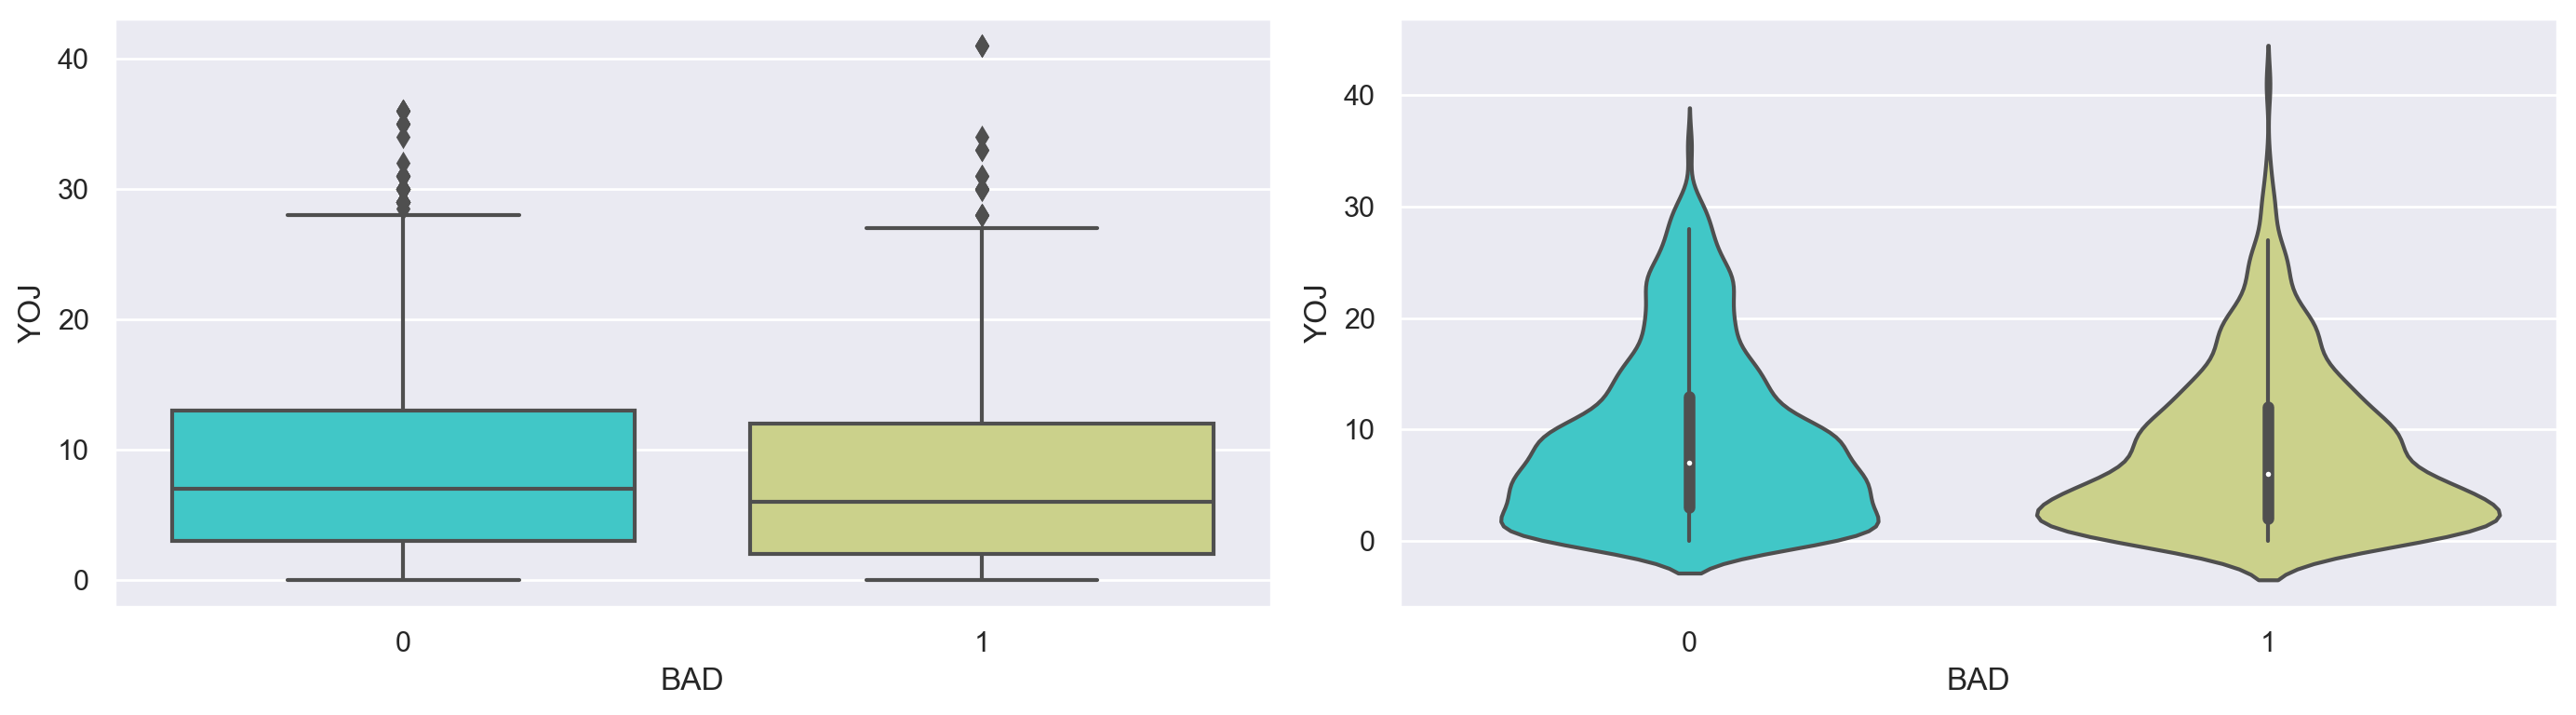

In [120]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['YOJ'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['YOJ'],palette="rainbow")
plt.tight_layout()

**Insights**
1. The median value of years spent in the current job is lower for the defaulters in loan repayment, which suggests that people with lesser experience in their current job tended to default more than their counterparts. However, there are outliers who defualted even with ~40 years of experience on their current job.
2. There are many people with greater than 20 years experience, who have been 'good' borrowers. 

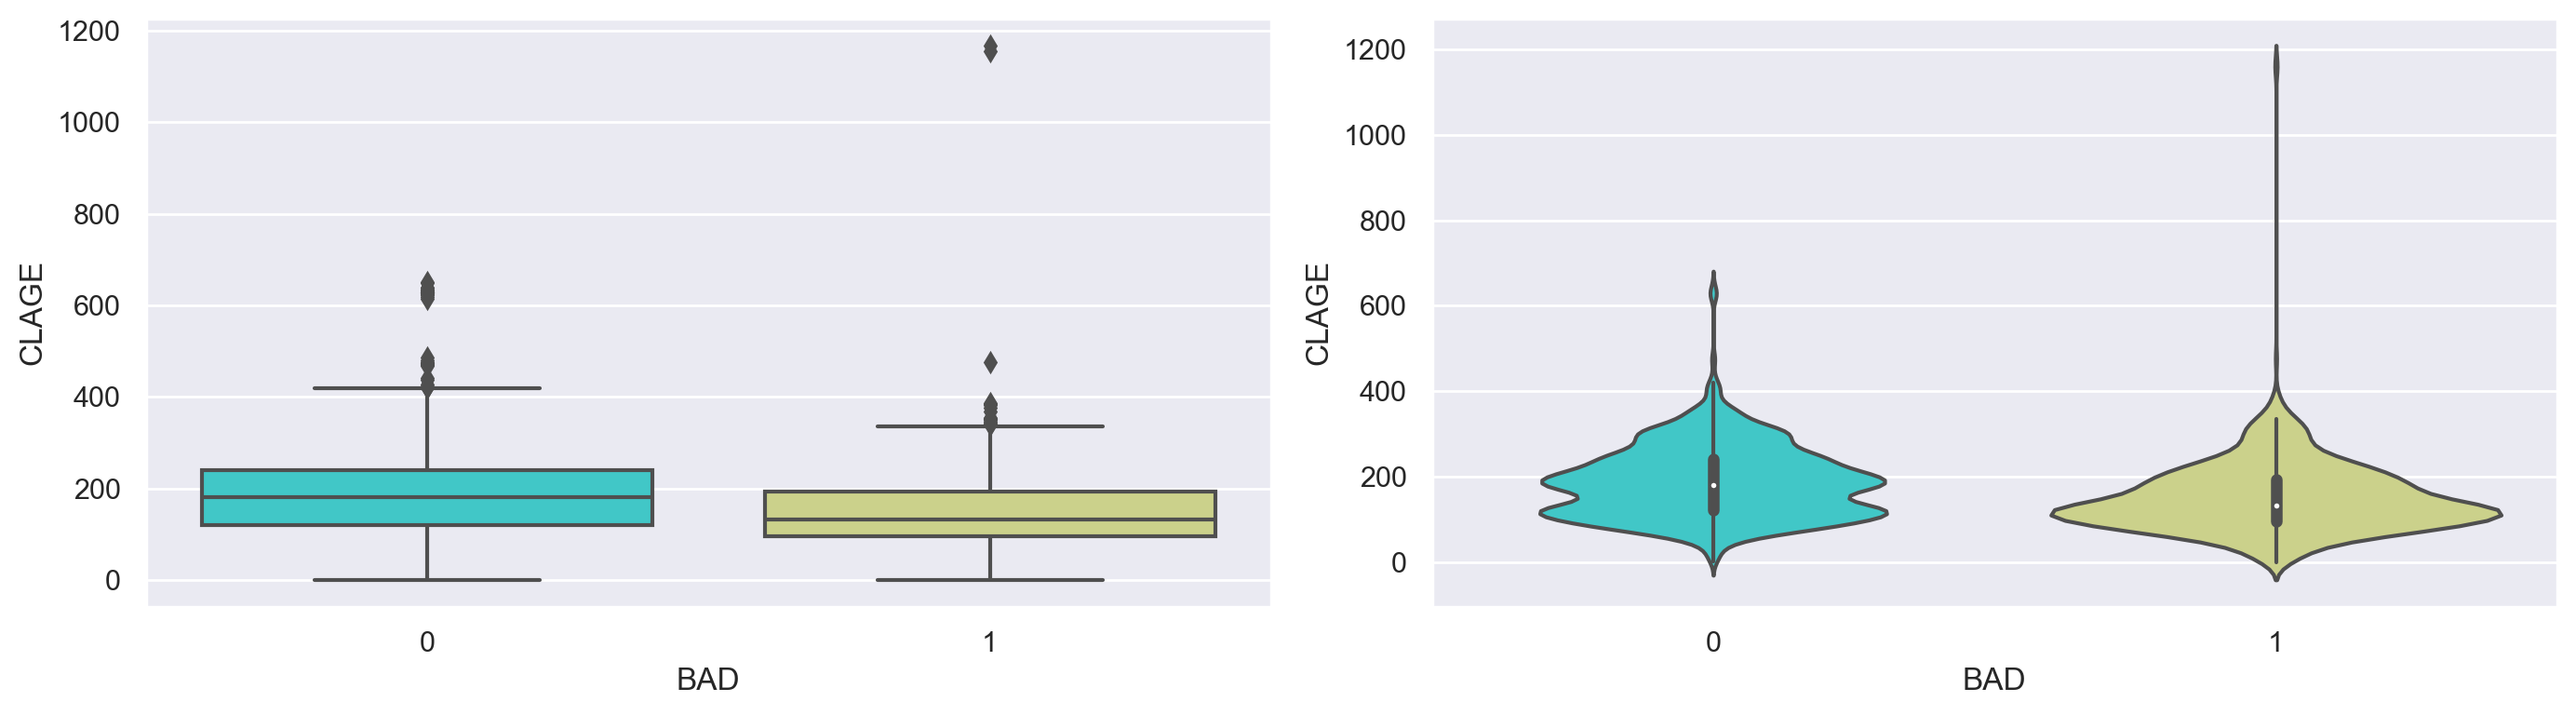

In [121]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['CLAGE'],palette="rainbow")
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['CLAGE'],palette="rainbow")
plt.tight_layout()

**Insights**
1. The median value of the age of the oldest existing credit line of non-defaulting clients is greater than their counterparts. There are also a few outliers in the data.
2. There are many 'good' clients running ~100 and ~200 months old credit lines.(A good client is one who makes repayments on time)

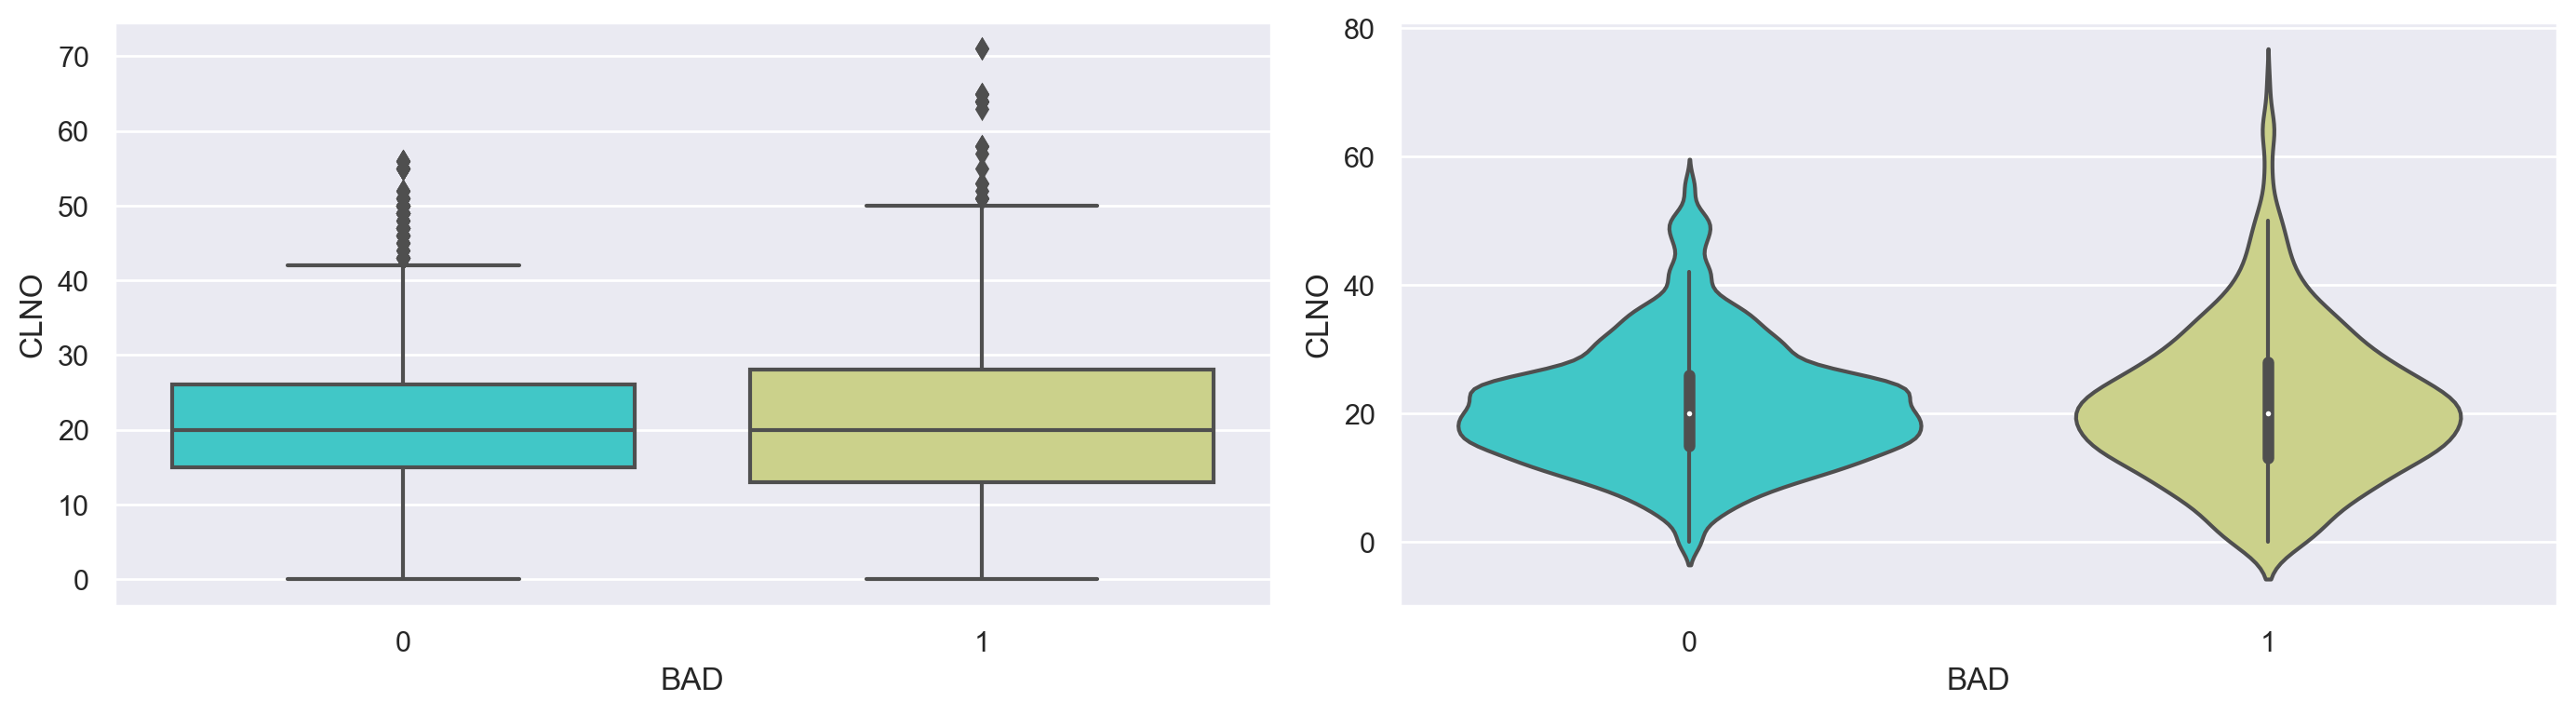

In [122]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['CLNO'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['CLNO'],palette="rainbow")
plt.tight_layout()

**Insights**
1. The median value of the number of exisitng credit lines at the time of default is the same for both defaulters and non-defaulters.
2. The count of a good client's active credit lines seems to be concentrated over a range of 15 to 25 (for the most part). This count is more spread for defaulters. In the outliers, we can see that almost all clients having more than 60 CLs have defaulted.

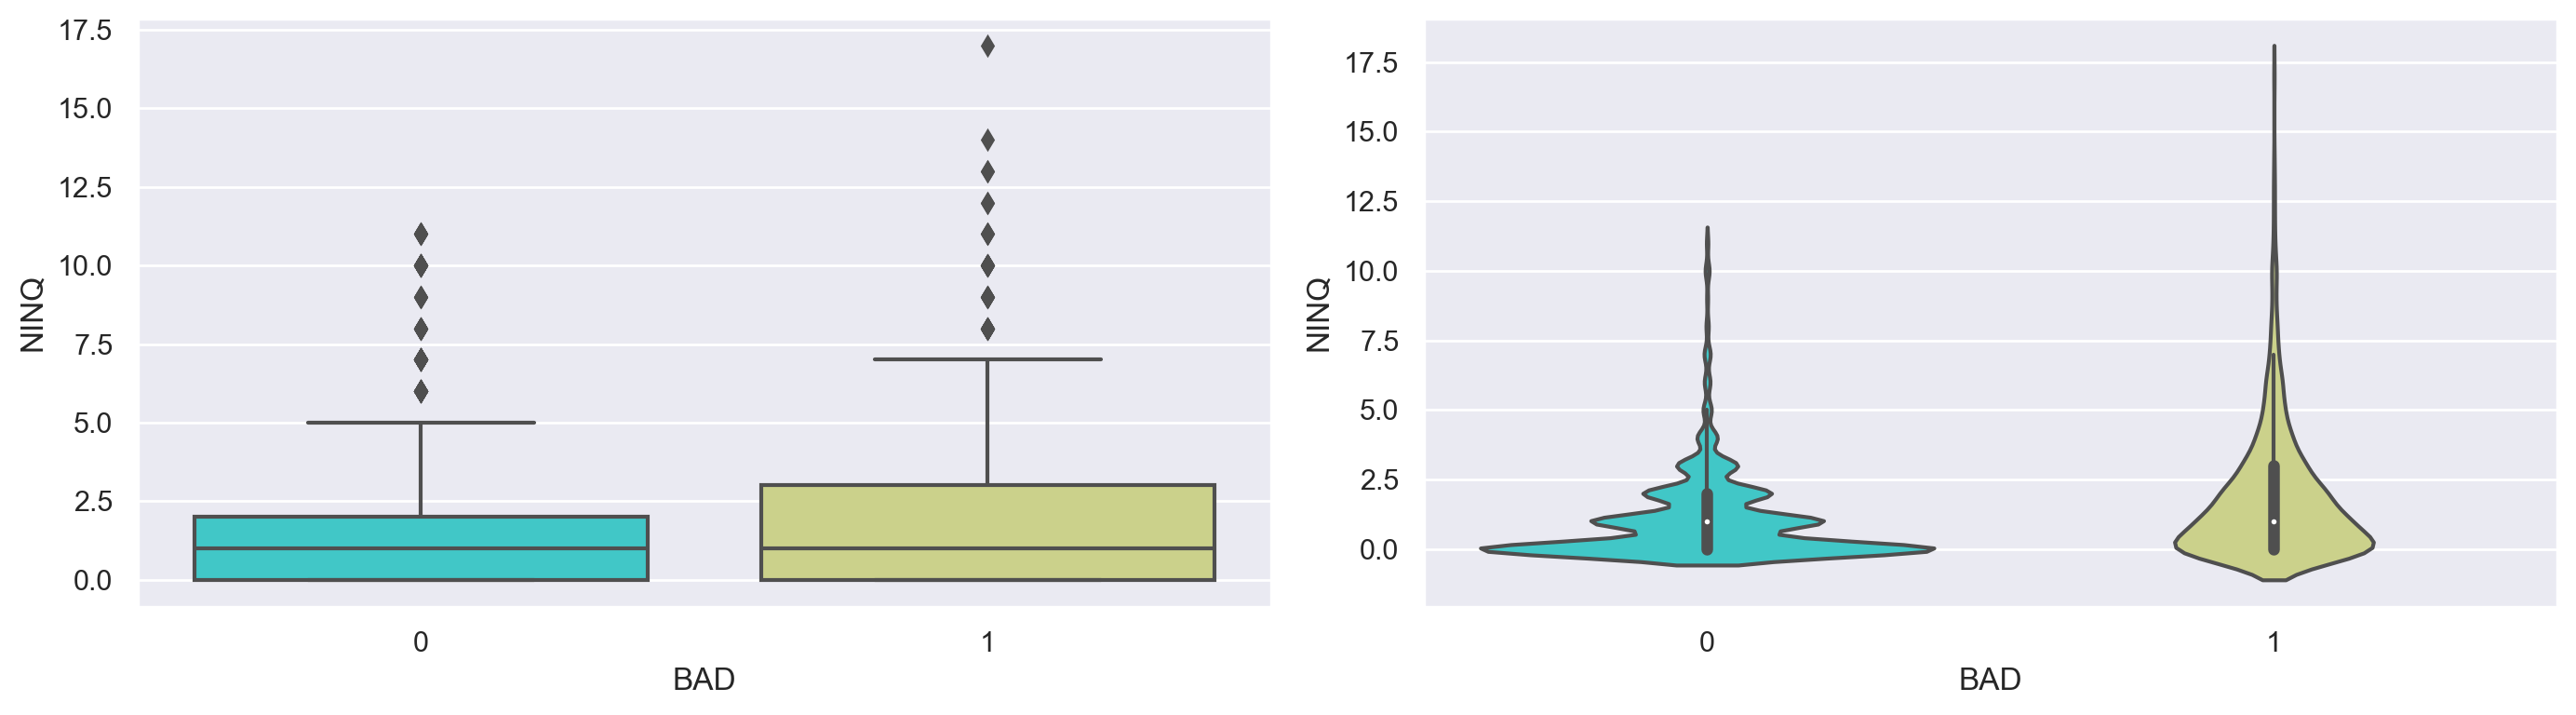

In [123]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['NINQ'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['NINQ'],palette="rainbow")
plt.tight_layout()

**Insights**
1. The median value of number of credit enquiries against both types of clients is almost the same.
2. Further, as per the third and fourth quartiles' data, maximum number of credit enquiries tend to be against defaulting clients. It might be indicative of the nature of defaulting clients to try to seek credit from whichever means possible as a last resort to recover from their financial condition.

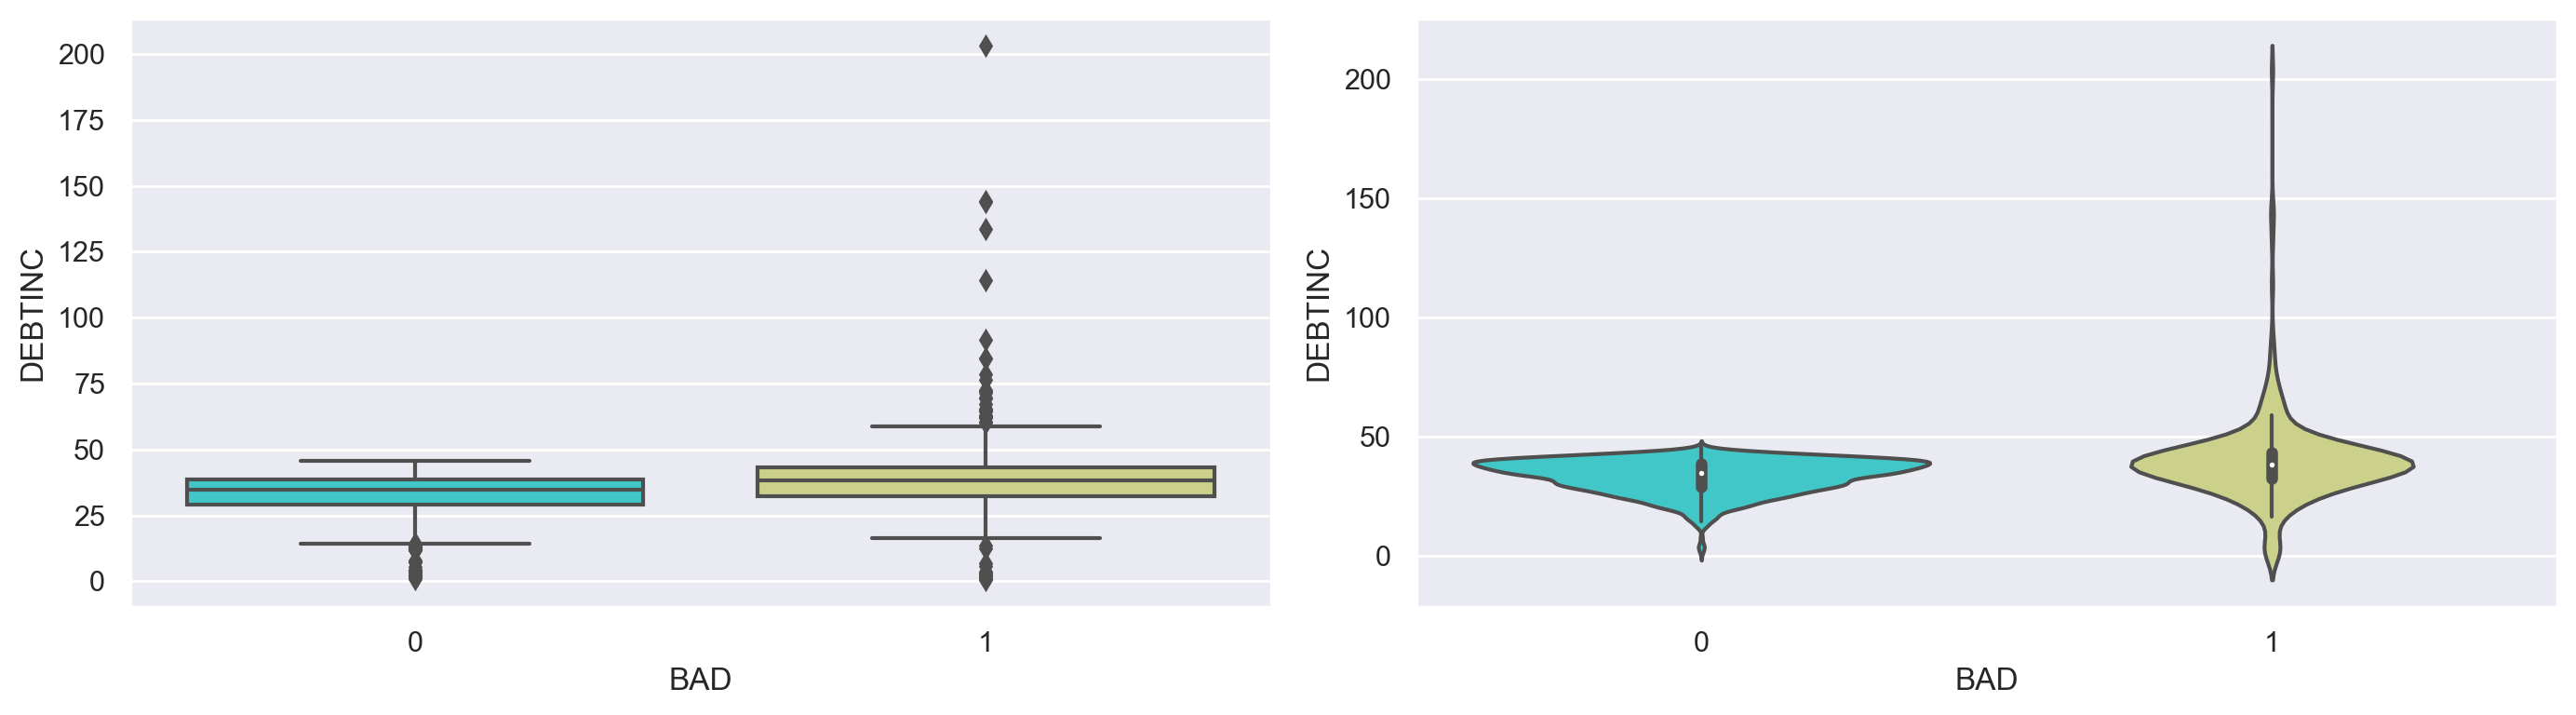

In [124]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['DEBTINC'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['DEBTINC'],palette="rainbow")
plt.tight_layout()

**Insights**

1. Debt to Income ratio seems to have a clear relationship with the target variable.
2. The median value of Debt to Income ratio is higher for defaulting clients, as expected. There are many outliers with a very high value of Debt to Income ratio, who have all defaulted.

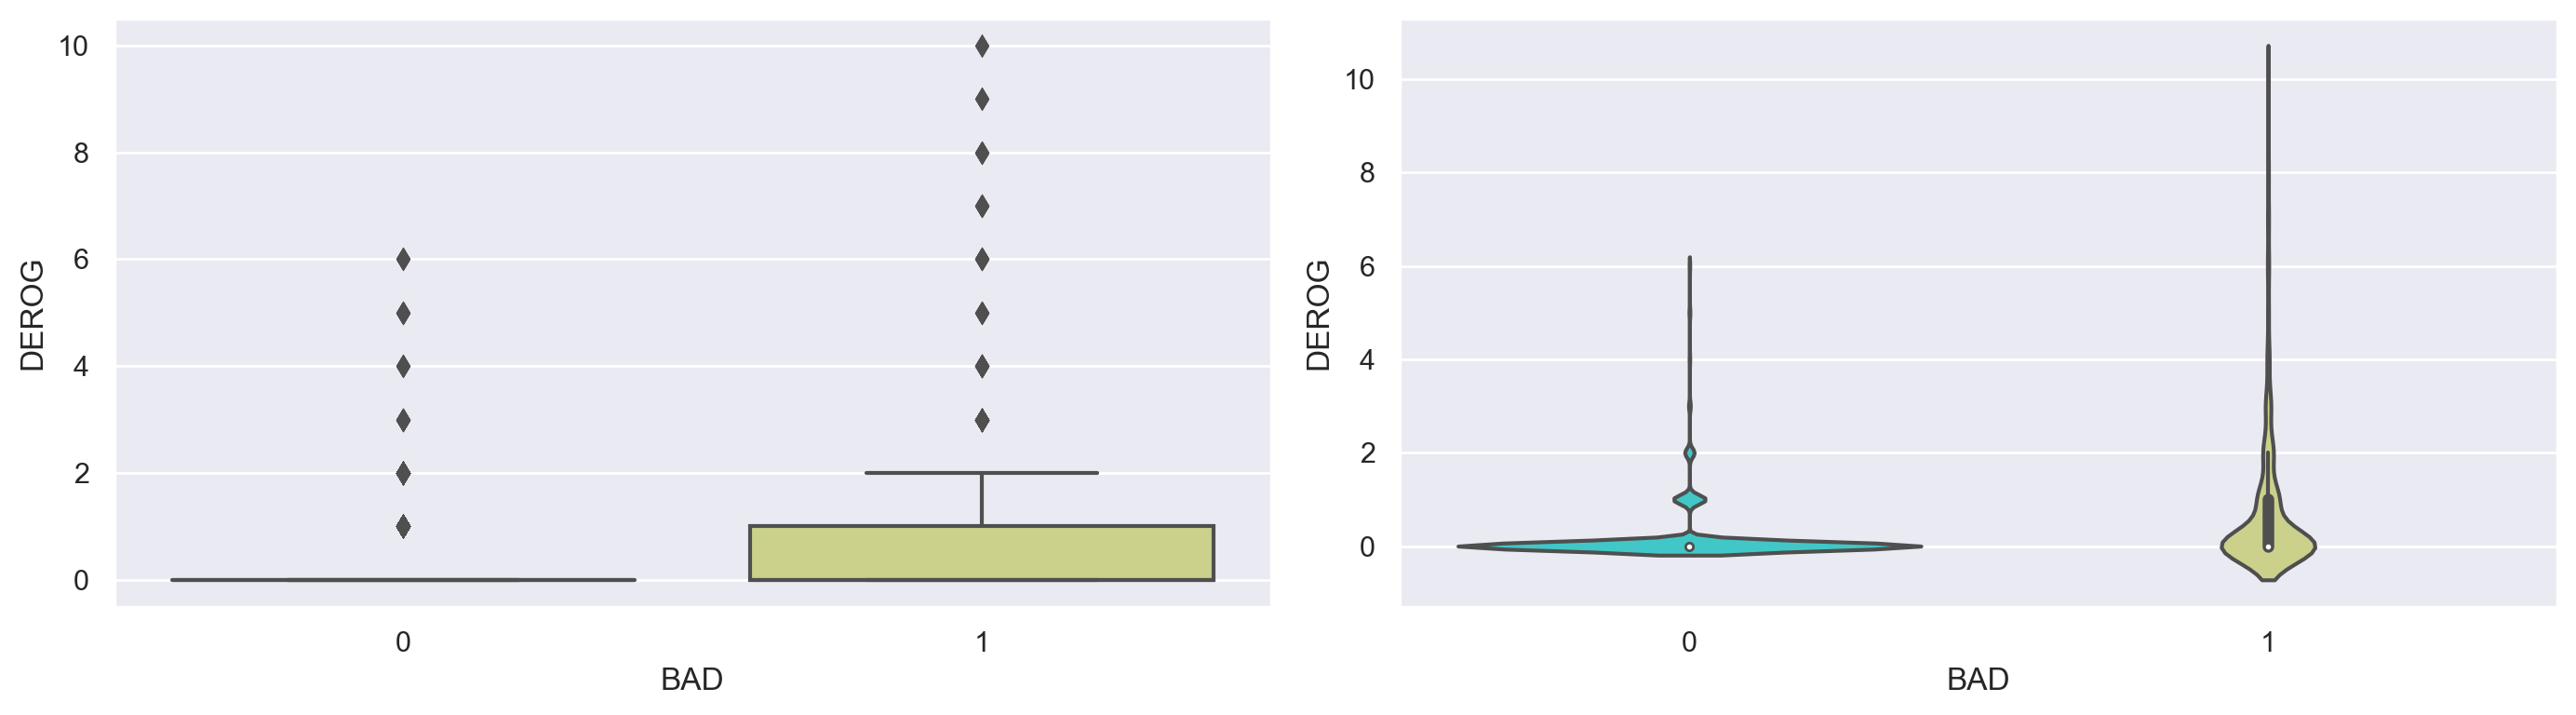

In [125]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['DEROG'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['DEROG'],palette="rainbow")
plt.tight_layout()

**Insights**

1. For clients of both kinds, the median value of number of derogatory reports is zero. However, 50% defaulting clients have one or more derog reports raised against them.

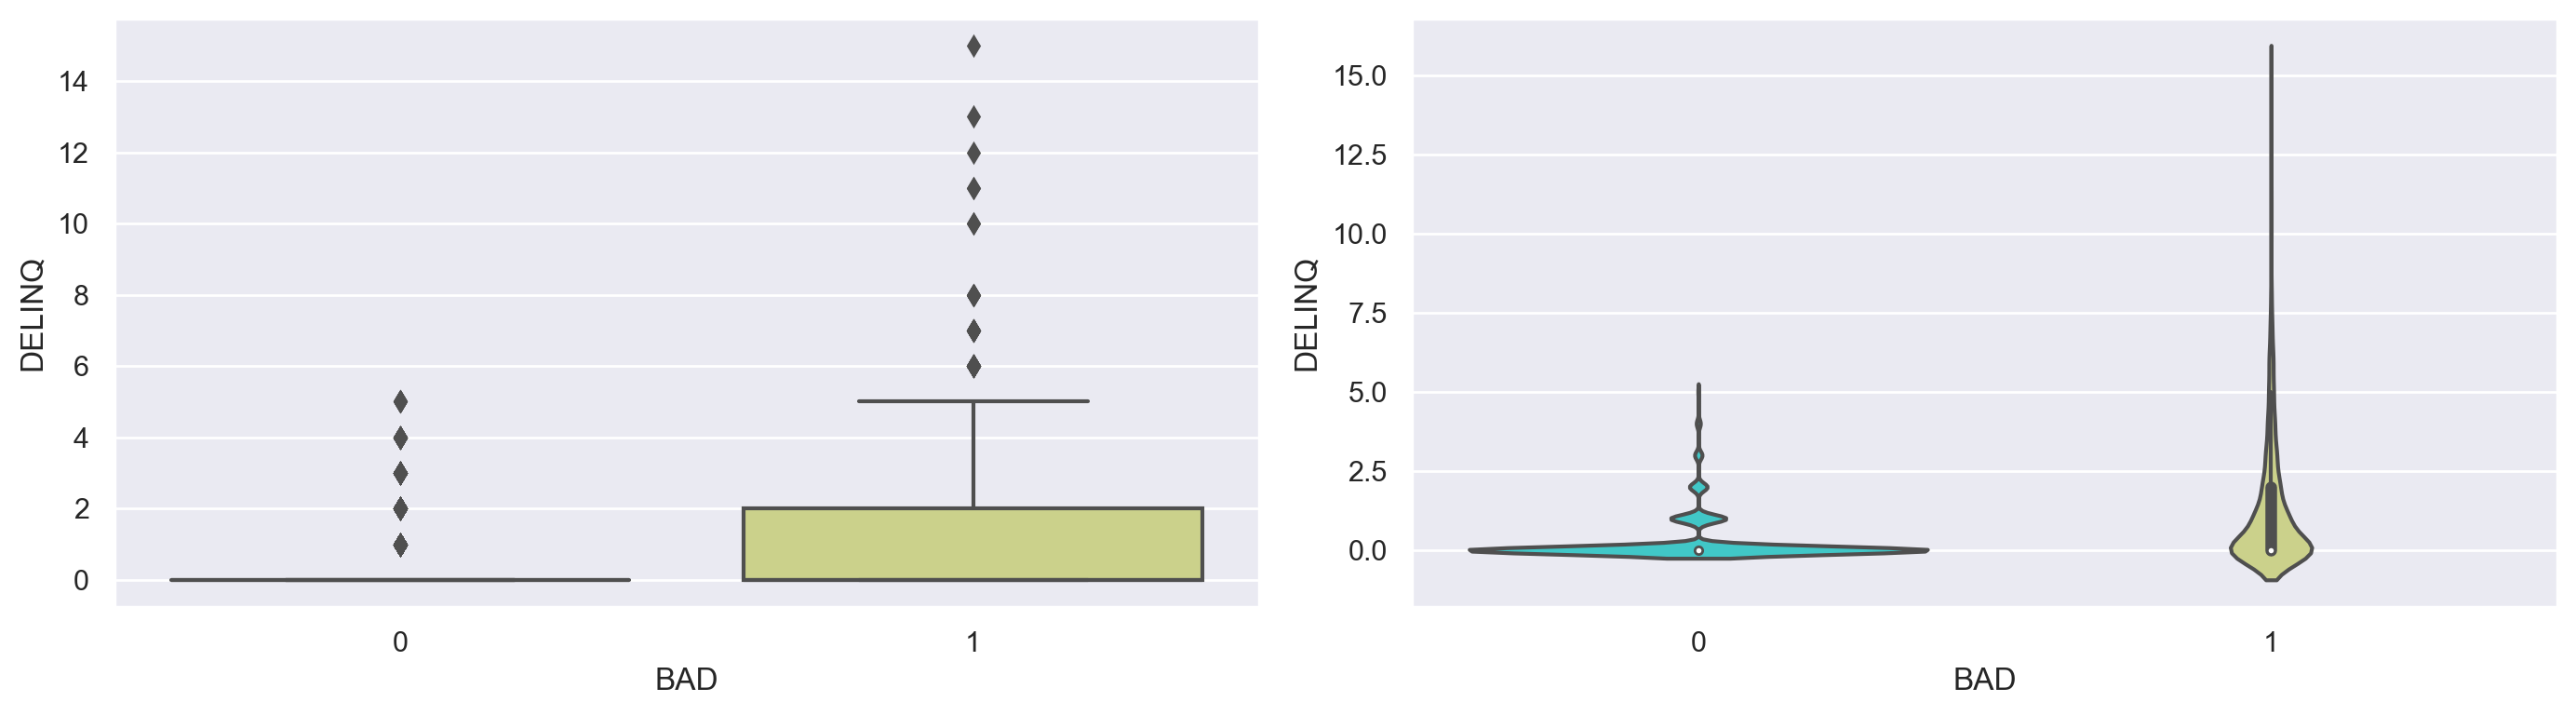

In [126]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data["BAD"],data['DELINQ'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(data["BAD"],data['DELINQ'],palette="rainbow")
plt.tight_layout()

**Insights**

1. The distribution is very similar to that of derogatory reports.
2. For clients of both kinds, the median value of number of delinquency reports is zero. However, 50% defaulting clients have one or more delinquency reports raised against them.

#### Analyze REASON vs numerical variables

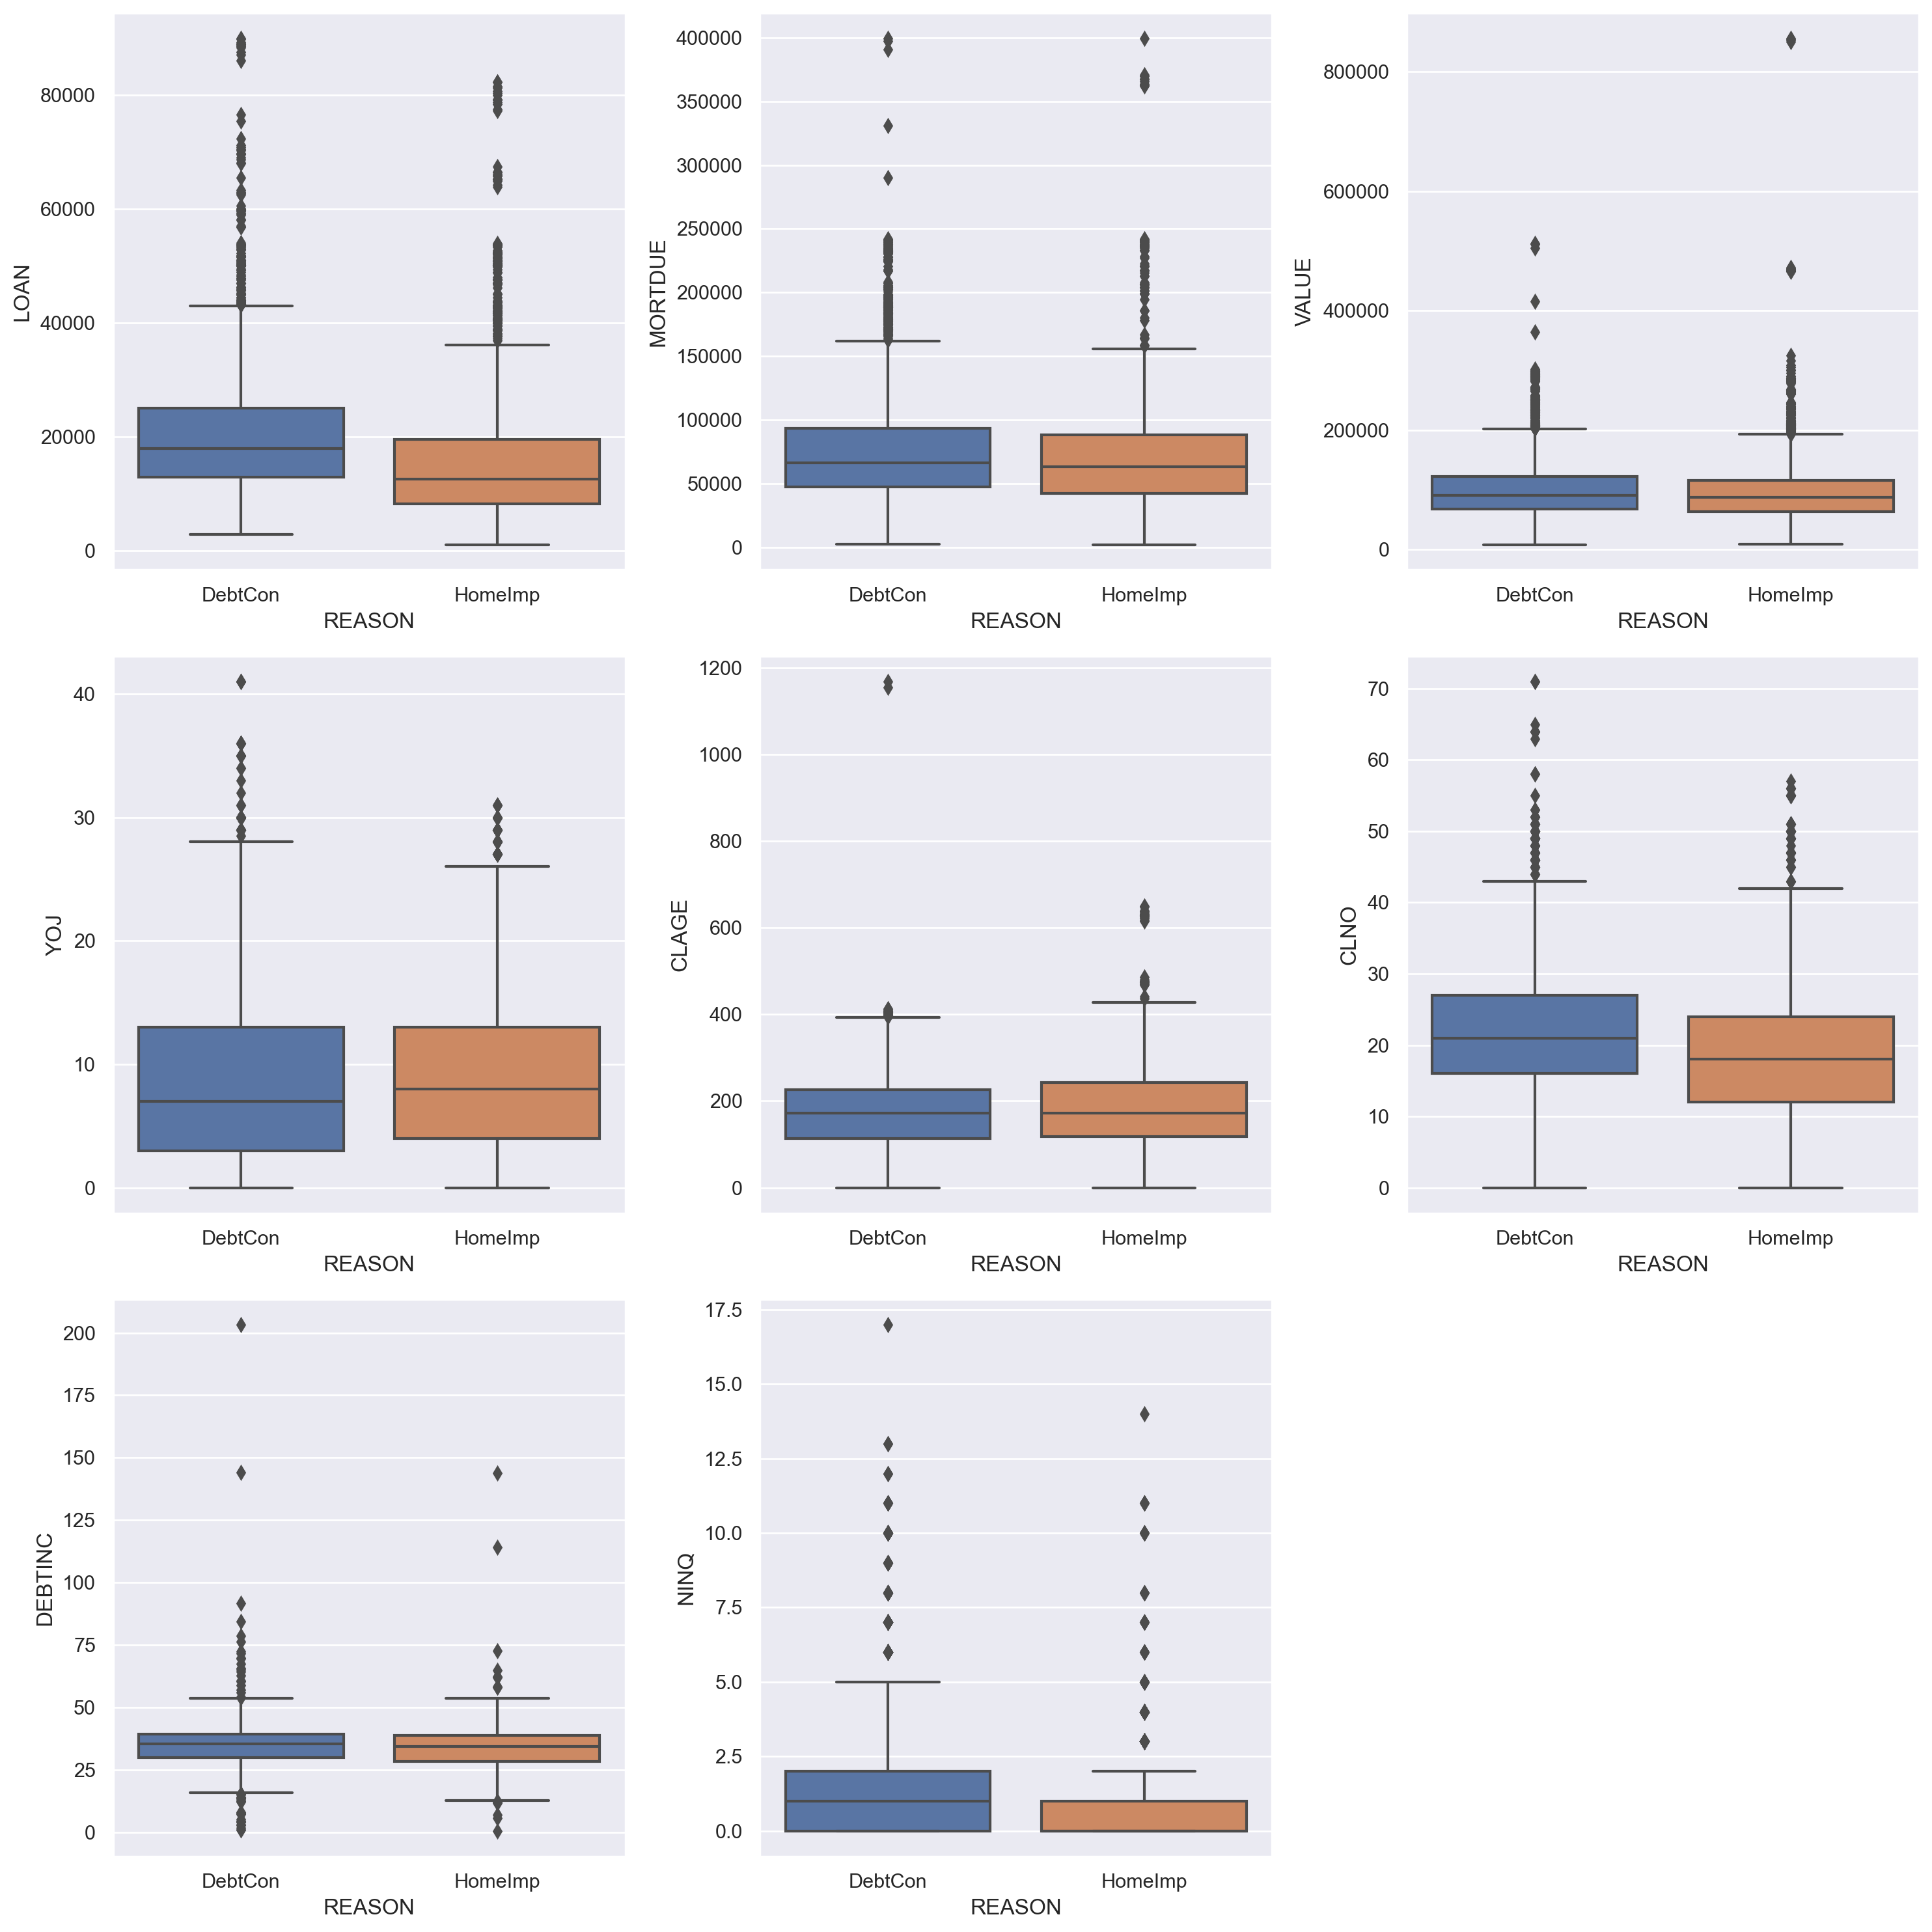

In [127]:
rows = 3
cols = 3
fig = plt.figure(figsize= (15,15),dpi=200)

num_cols=['LOAN','MORTDUE','VALUE','YOJ','CLAGE','CLNO','DEBTINC','NINQ']

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.boxplot(data['REASON'],data[col], ax=ax)
    
fig.tight_layout()
plt.show()

**Insights**

1. Median value of amount of loan approved for Debt Consolidation is significantly greater than that for home improvement. Further, the amount due on existing mortgage for them is greater than that of those borrowing for home improvement.
2. Borrowers whose property is evaluated for a higher price seek to consolidate their debts.
3. Clients seeking loans for home improvement have spent more time at their current job than the other group.
4. The number of existing credit lines are higher for clients seeking to consolidate their debts. It seems natural then, that their Debt to income ratio is also higher than their counterparts. Also, the number of credit enquiries against them are significantly  greater than clients citing home improvement as the reason for seeking debt.

#### Analyze JOB vs numeric variables

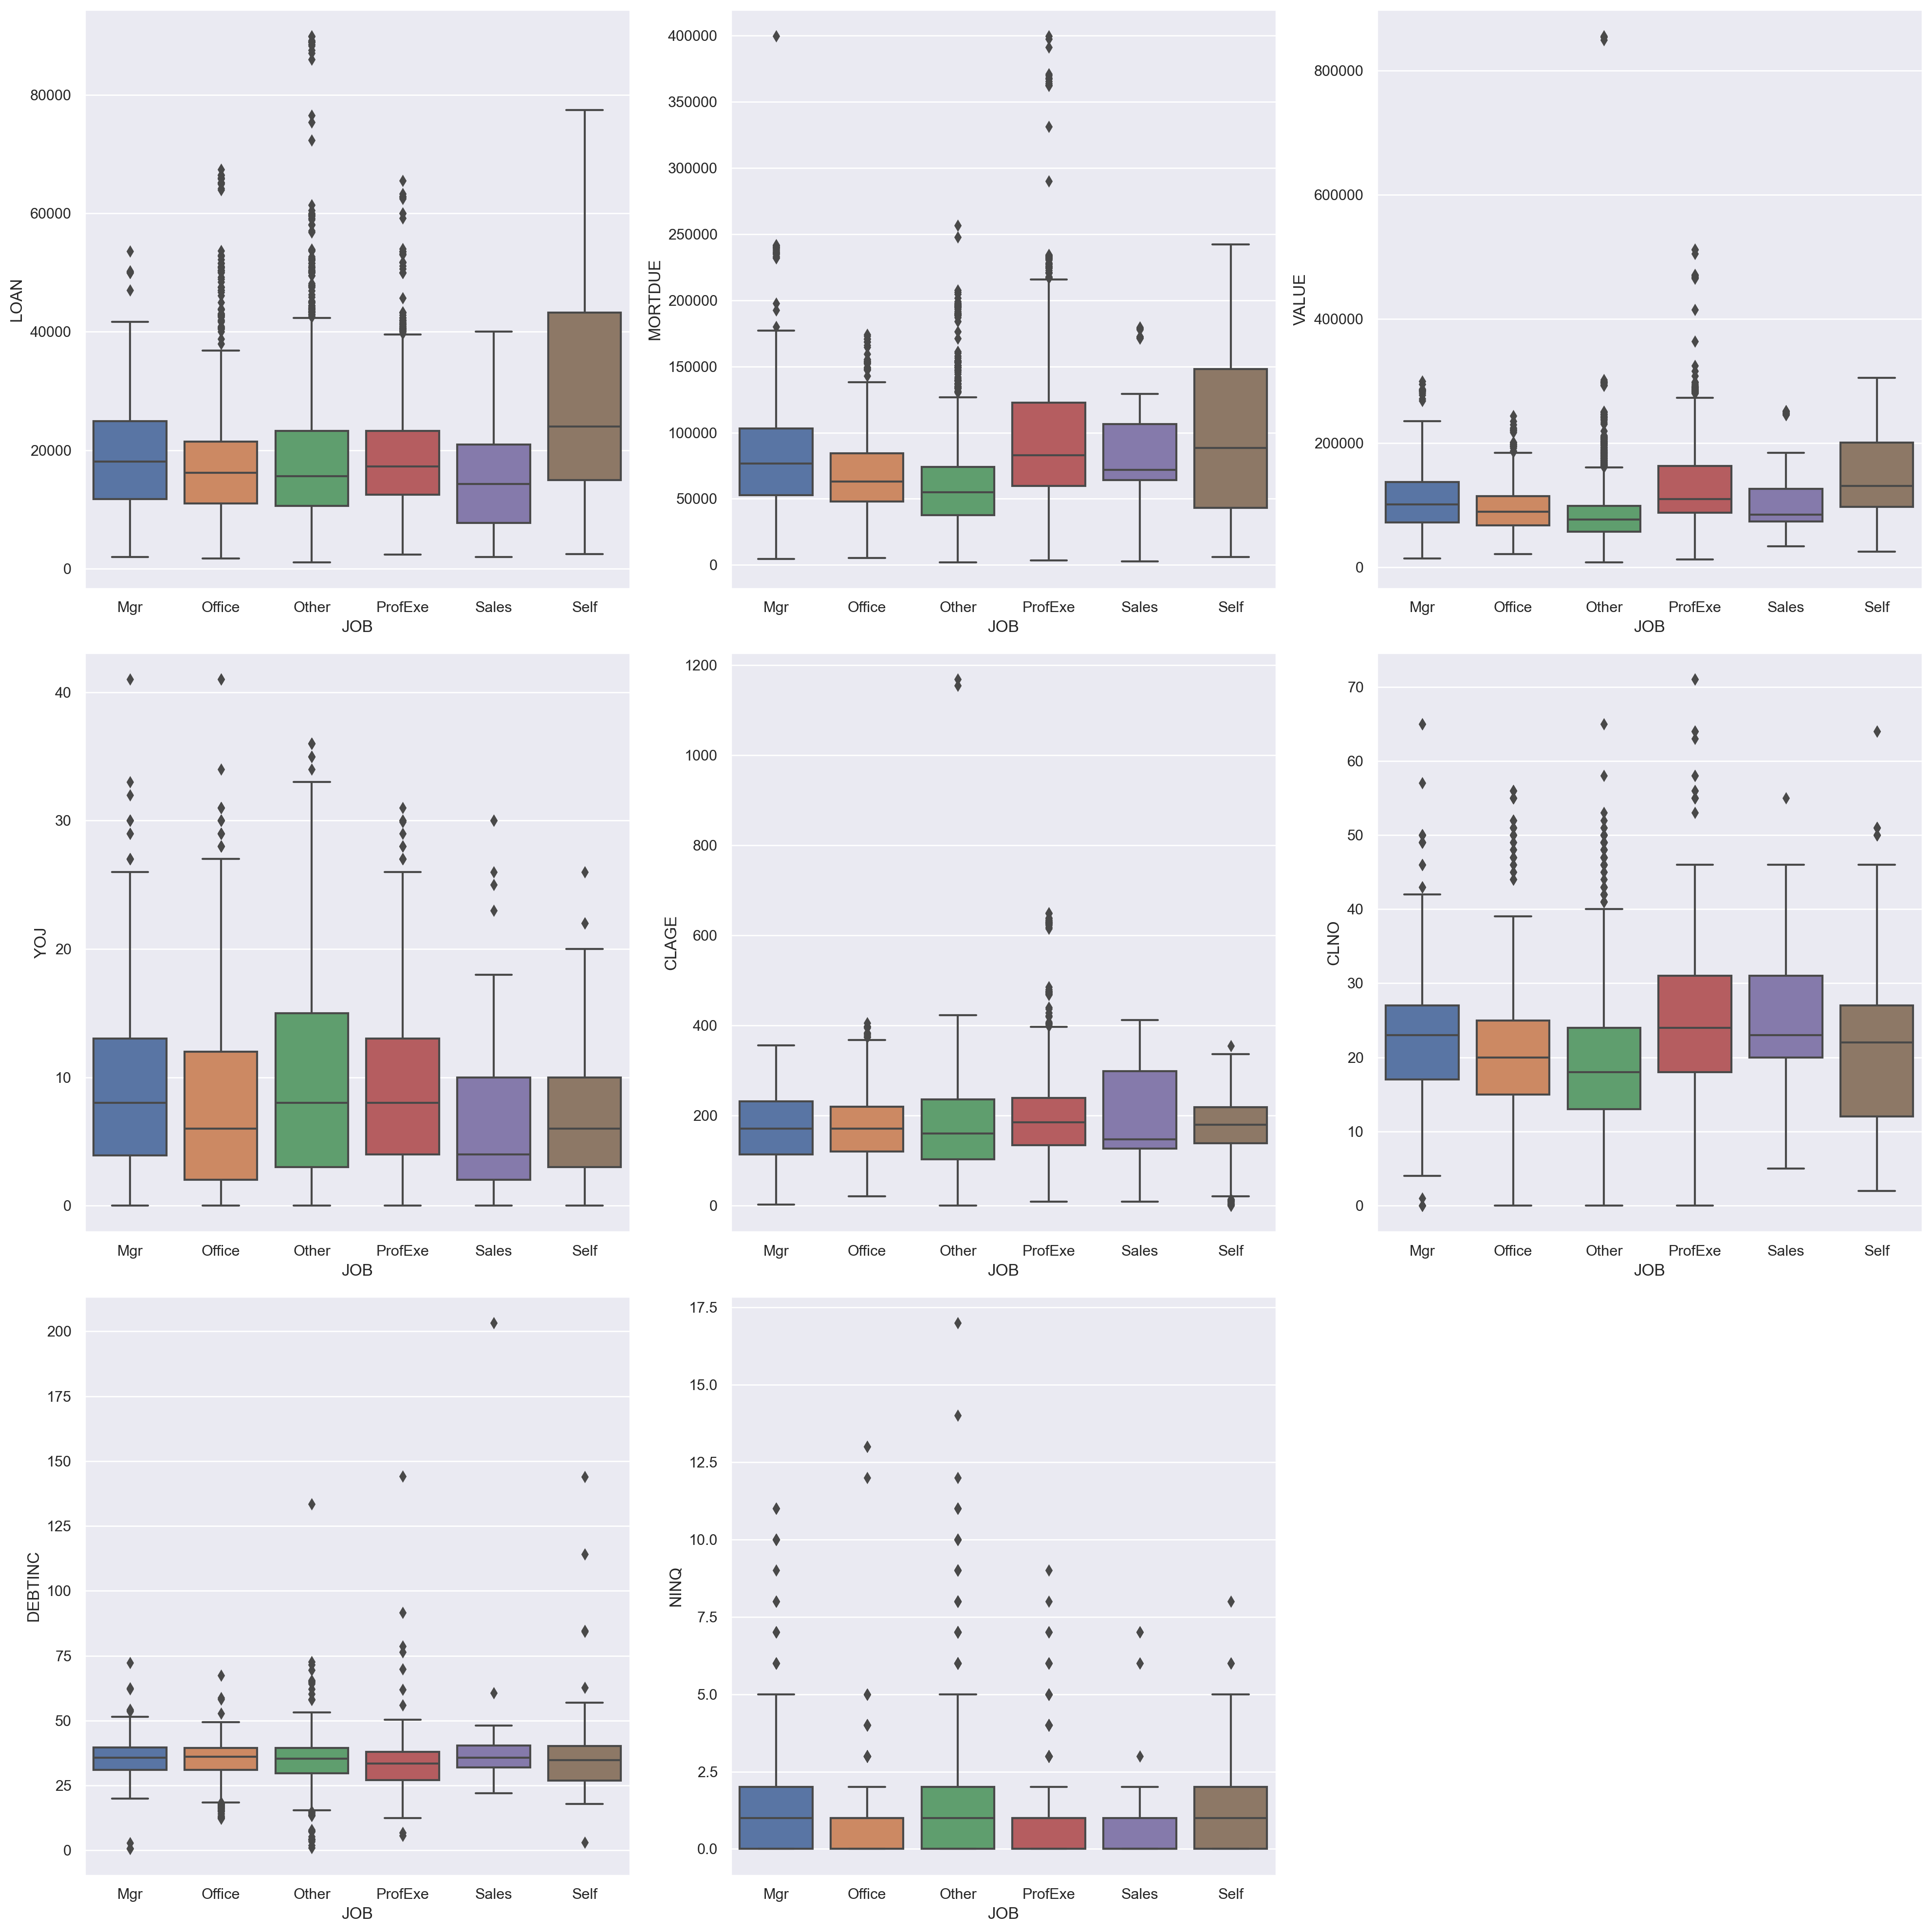

In [128]:
rows = 3
cols = 3
fig = plt.figure(figsize= (20,20),dpi=200)

num_cols=['LOAN','MORTDUE','VALUE','YOJ','CLAGE','CLNO','DEBTINC','NINQ']
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.boxplot(data['JOB'],data[col], ax=ax)
    
fig.tight_layout()
plt.show()

**Insights**

1. The amount due on the existing mortgage, the current value of property as well as the amount of loan approved is highest for Self employed clients. Further, the lowest mortgage due amount and the properties with lowest current value belong to clients whose job is listed as'Other'.However, loan sanction amount is lowest for clients in sales jobs. 
2. Professional Executives and people with 'Other' have the highest number of years spent at their current job. People from sales have had the lowest tenure at their current jobs as compared to the rest.
3. Professional executives have both the oldest and maximum number of running credit lines and the across all their counterparts and the most recent credit lines belong to Sales personnel. Lowest number of credit lines are held by the 'Other' category clients.
4. Debt to Income ratio is lowest for Professional Executives and is highest for Sales personnel. However, there is not much difference in DTI ratio across diverse industries.
5. Number of recent credit enquiries is the lowest for Professional Executives, Sales personnel and clients employed in office jobs. Managers, self employed personnel and 'Other' category people have comparatively higher number of credit enquiries.


### **Bivariate Analysis: Two Continuous Variables**

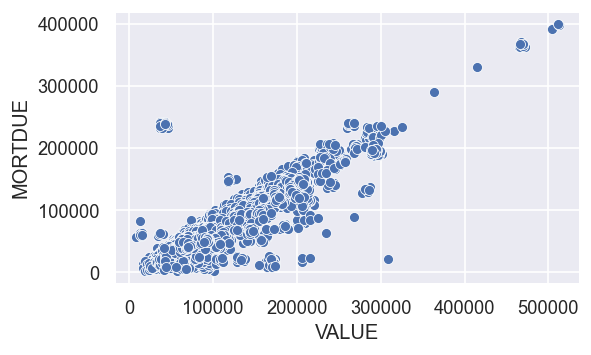

In [129]:
plt.figure(figsize=(5,3),dpi=120)
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu");

**Insights:**
1. Amount due on the existing mortgage and the current value of the property are strongly positively correlated.
2. This might be due to the fact that the amount of home equity loan approved is directly related to the amount of equity built on the existing property and:-                                 
    **Equity built = Current value of property - Mortgage due**
 

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<Figure size 5000x5000 with 0 Axes>

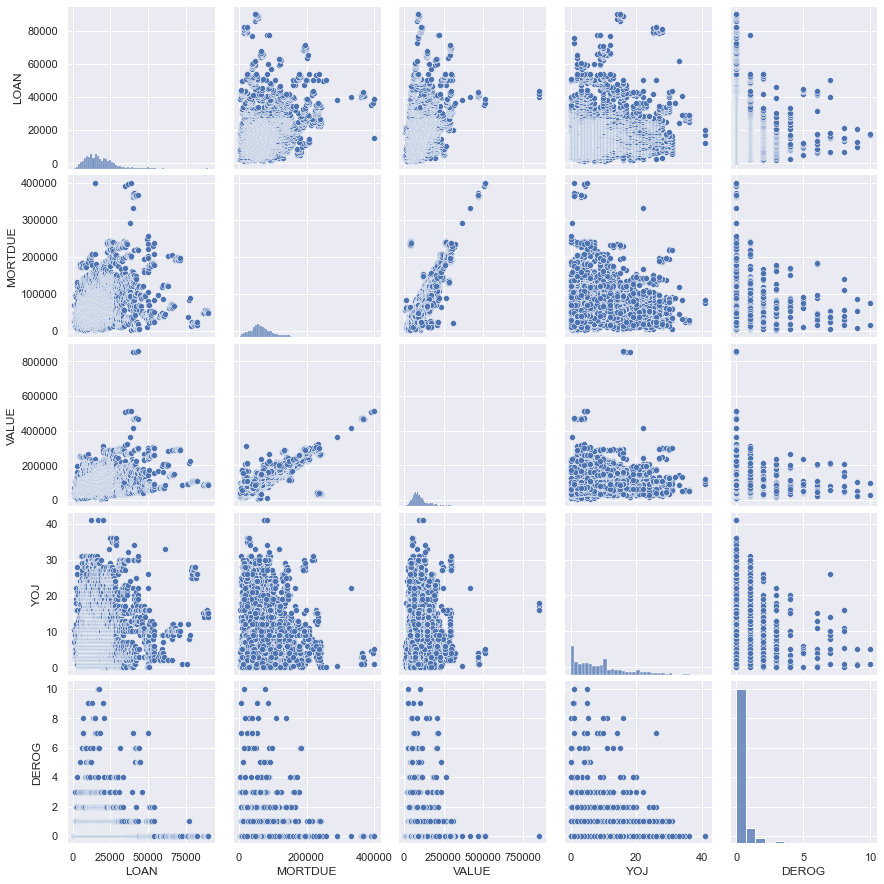

In [130]:
# Create slices of original dataframe having only continuous variables
df_con=data.select_dtypes(include='number')

# Continuous variables: LOAN, MORTDUE, VALUE, YOJ, DEROG
df_con1=df_con.iloc[:,:5]

# Continuous variables: DEBTINC, CLNO, NINQ, CLAGE, DELINQ
df_con2=df_con.iloc[:,5:]

# Let's create pairplots of continuous variables for these sliced dataframes one by one 
# so that we aren't bombarded with too many pairplots at once 
plt.figure(figsize=(25,25),dpi=200)
sns.pairplot(df_con1);

**Insights**

1. As seen earlier, a clear positive correlation is emerging between 'MORTDUE' and 'VALUE'.
2. A weak positive correlation between 'Mortdue' and 'Loan' is visible.
3. Similarly, a weak positively correlated relationship is emerging between 'Loan' and 'Value'.


<Figure size 5000x5000 with 0 Axes>

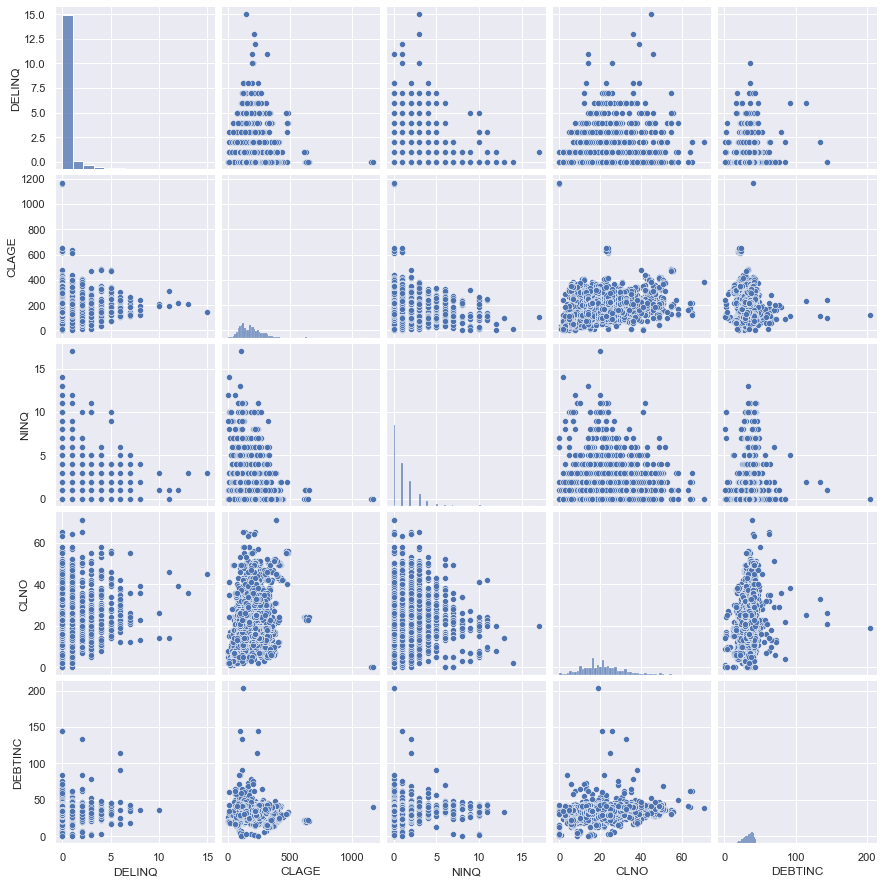

In [131]:
plt.figure(figsize=(25,25),dpi=200)
sns.pairplot(df_con2)

**Insights**

1. There seems to be a weak positive correlation between number of existing credit lines and the age of the oldest running credit line.
2. There seems to be no correlation at all between 'Debtinc' and 'CLNO', and also between 'CLNO' and 'CLAGE'.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [132]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*115)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,4))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
-------------------------------------------------------------------------------------------------------------------


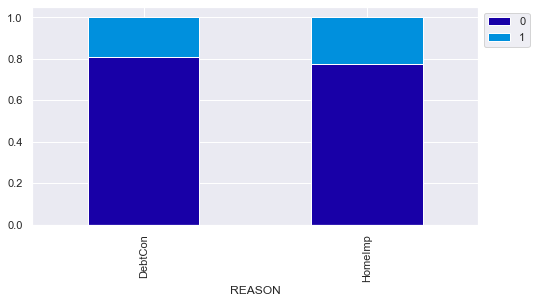

In [133]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**

1. The ratio of loan-defaults is slightly higher for clients who borrow citing 'Home improvement' as the reason.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
-------------------------------------------------------------------------------------------------------------------


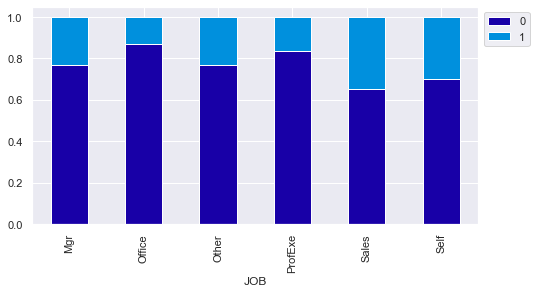

In [134]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

**Insights**

1. Out of all the professions, highest number of defaulters come from 'Sales', followed by 'self-employed' clients.
2. The ratio is lowest for people from 'Office' related jobs and 'Professional Executives' 

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
-------------------------------------------------------------------------------------------------------------------


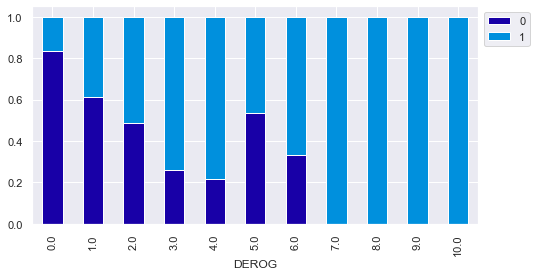

In [135]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['DEROG'])

**Insights**

1. As shown in the plot, the ratio of defaults increased with an increase in the number of derogatory reports, ingeneral. It is minimum for clients with nil derogatory reports in their records, which is expected.

2. Almost all clients with 7 or more derogatory reports, turned into defaulters.

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
-------------------------------------------------------------------------------------------------------------------


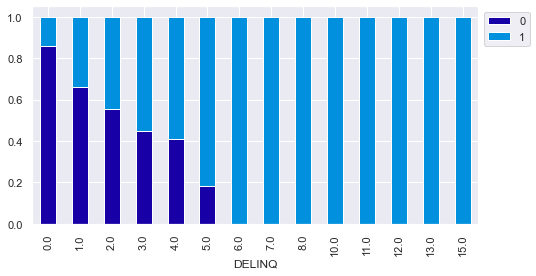

In [136]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['DELINQ'])

**Insights**

1. The plot is very similar to that of 'derogatory reports' and here the relationship is even more evident. As shown in the plot, the ratio of defaults increases with an increase in the number of delinquency reports, in general. It is minimum for clients with nil delinquency reports in their records, which is expected.

2. Almost all clients with more than 5 delinquency reports, turned into defaulters.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

In [137]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

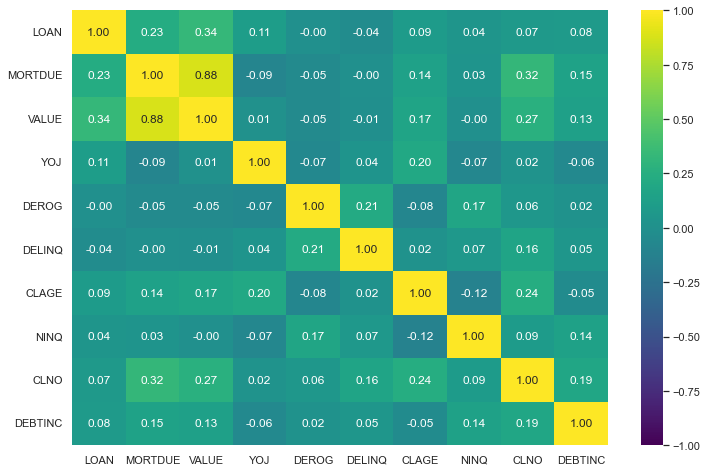

In [138]:
# Separating numerical variables from the data_replica (The 'data' dataframe has 'BAD' as categorical variable)
numerical_col = data_replica.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data_replica[numerical_col].corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='viridis',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True);

In [139]:
data_replica

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

**Insights**

1. There is a strong positive correlation between 'MORTDUE' and 'VALUE', meaning that change in one affects another. We will have to take that into account while building our model.
2. Positive correlation between 'LOAN' and 'VALUE' is observed, which seems natural. Higher the current value of property, higher loan amount can be sanctioned for the borrower.
3. Positive correlation between 'CLNO' and 'MORTDUE' are also observed, which is interesting.
3. DELINQ and DEROG have are poitively correlated with the Target Variable indicating that with an increase in the number of DELINQ/DEROG reports, the probability of loan default increases significantly, which goes with our instincts.

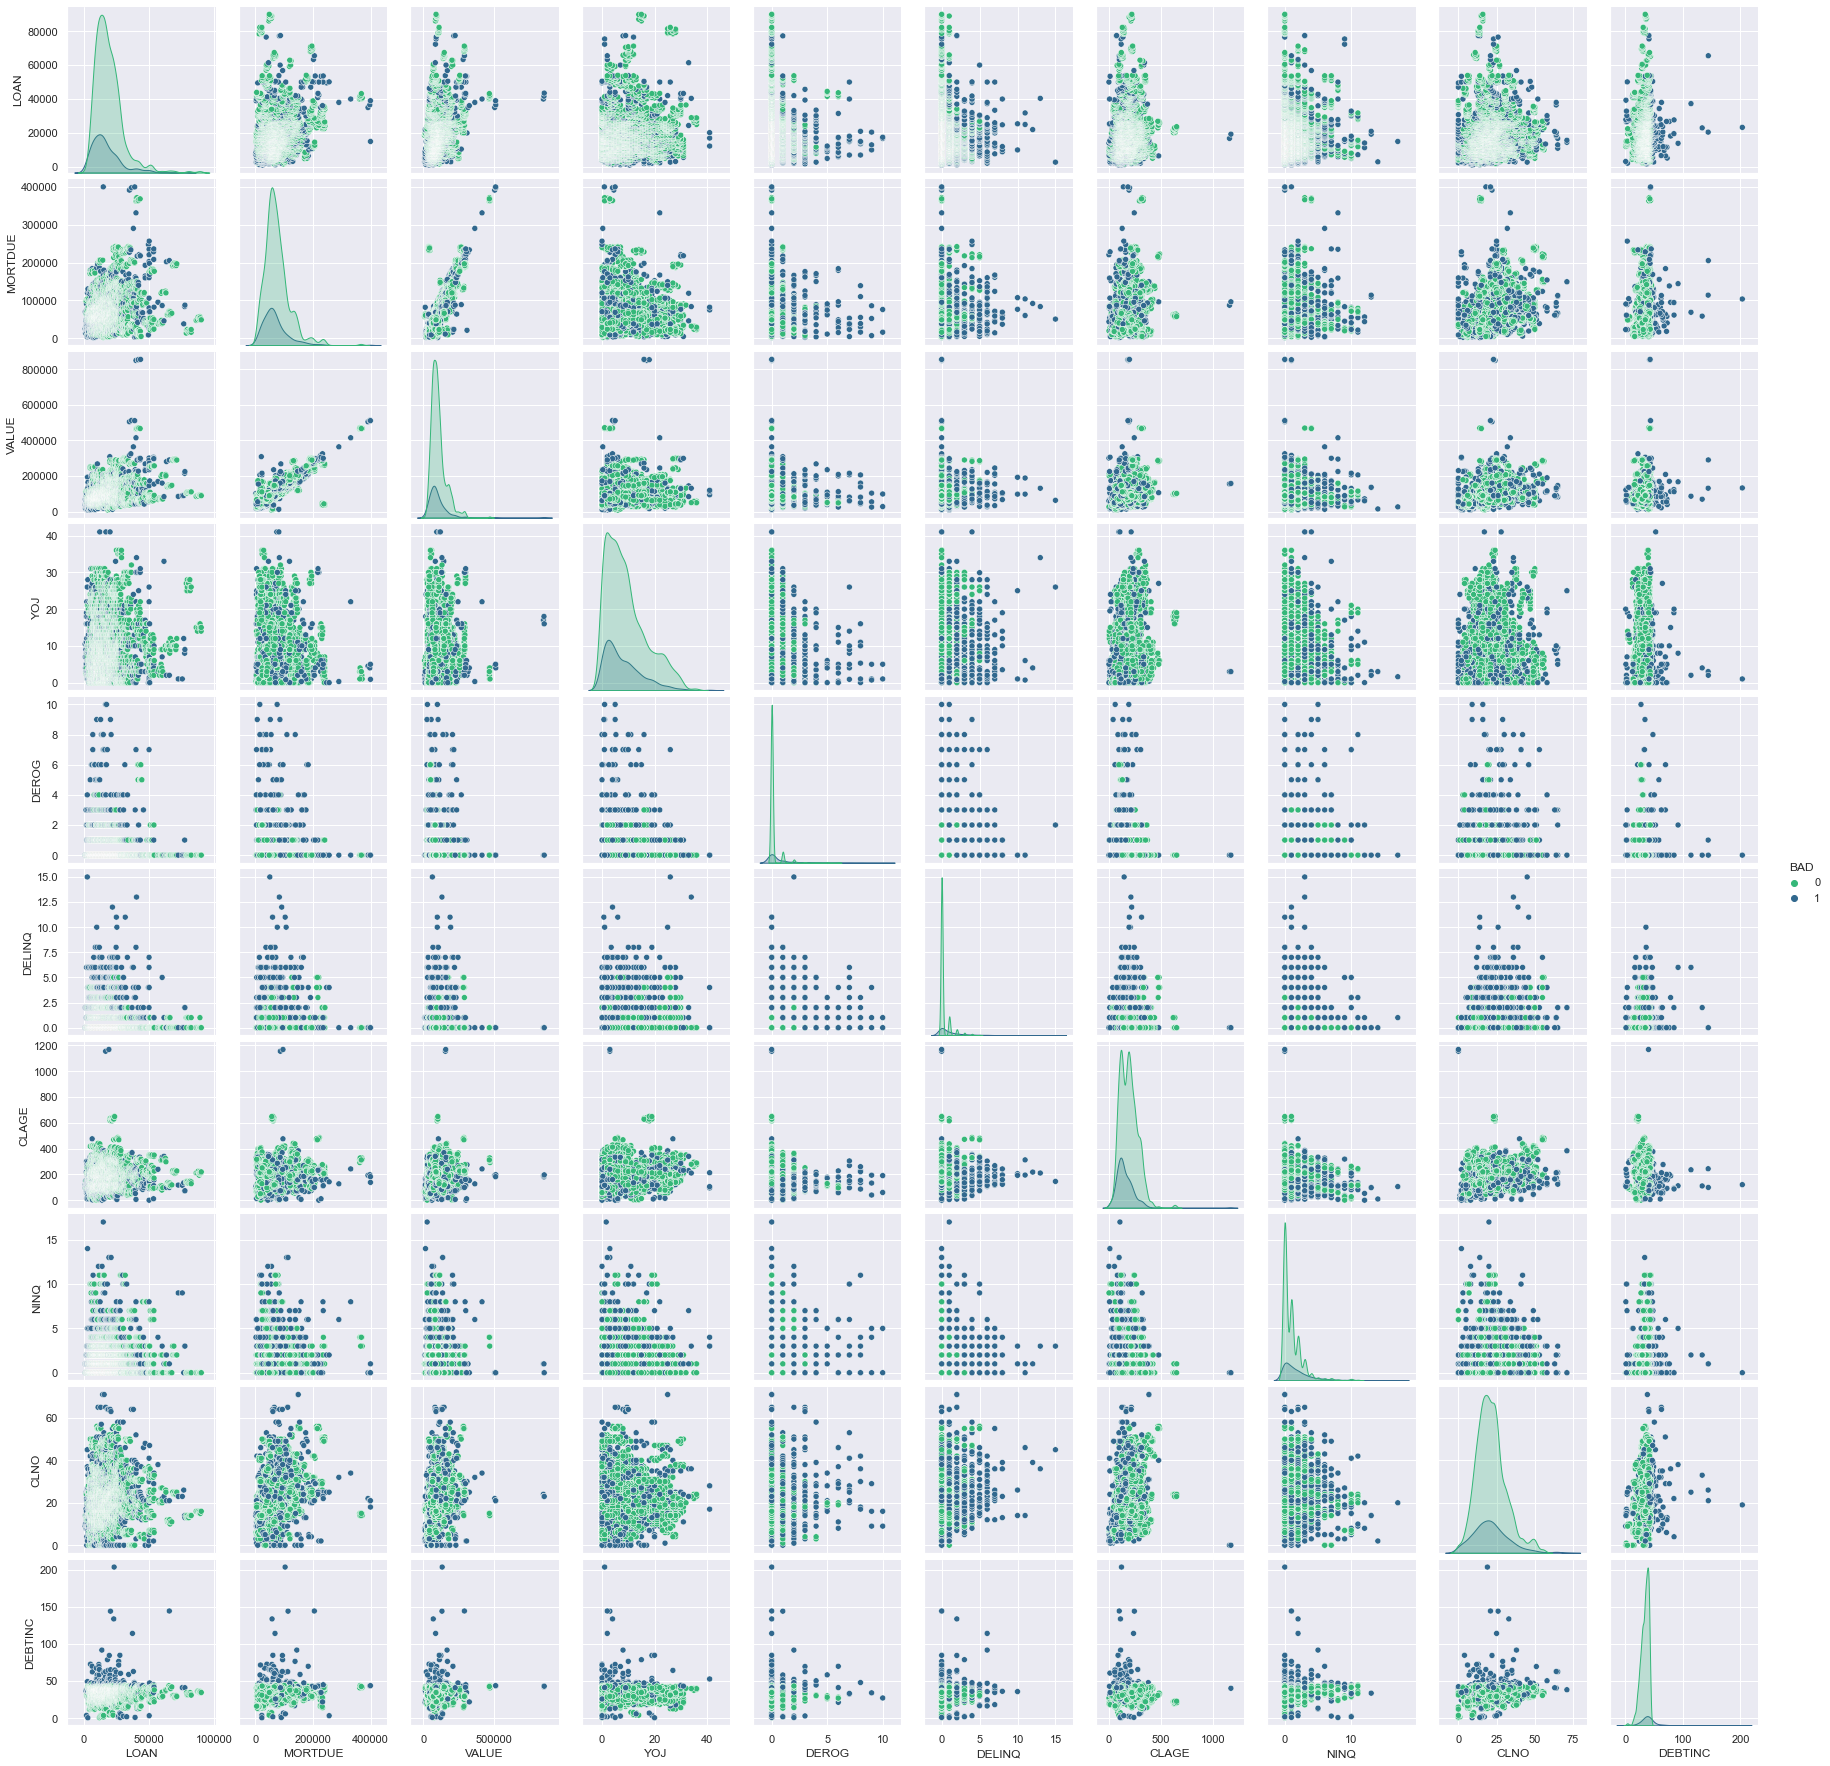

In [140]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data,hue='BAD',palette='viridis_r');

**Insights**

1. As can be seen in the plot, there are many outliers in the dataset.
2. There is no clear separation between the classes.
3. With increase in values of DEROG and DELINQ, the number of defaults increase as the concentration of blue dots increases towards the right side.
4. Greater number of defaults are observed when DEBTINC ratio is higher.
5. Similar observation for CLAGE is also evident. Higher incidence of defaults is associated with a low value of CLAGE.

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

* Earlier, we saw that MORTDUE and VALUE are highly correlated. 
* In order to get rid of multicollinearity , we can create a new feature as follows:
    **Equity built = Current value of property - Mortgage due**




#### Treating Outliers

In [141]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=np.quantile(df[col],0.25) # 25th quantile
    Q3=np.quantile(df[col],0.75) # 75th quantile
    IQR=Q3-Q1                  # IQR Range
    Lower_Whisker = Q1-(1.5*IQR) #define lower whisker
    Upper_Whisker = Q3+(1.5*IQR)  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df


In [142]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist() # getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)


#### Adding new columns in the dataset for each column which has missing values 

In [143]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [144]:
# Find out the list of columns that has missing values in it, 
# then call the function to add binary flags for missing values (add_binary_flag)
# Note that - df dataframe has the outliers treated already.

missing_col = [col for col in df.columns if df[col].isnull().any()] #If any val in a col is missing, return that col

for colmn in missing_col:
    add_binary_flag(df,colmn)
    
    
# For tree based models , we do not need to treat outliers,
# hence, let's add binary flags without adding binary flags for using it later

missing_col = [col for col in data_replica.columns if data_replica[col].isnull().any()] #If any val in a col is missing, return that col

for colmn in missing_col:
    add_binary_flag(data_replica,colmn)
    
data_replica

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
0      94.366667  ...                      False                       False   
1     121.833333  ...                      False                       False   
2     149.466667  ...                      False                       False   
3            NaN  ...                       True                        True   
4      93.333333  ...                      False                       False   
...          ...  ...                        ...                         ...   
5955  221.808718  ...                      False                       False   
5956  208.692070  ...                      False                       False   
5957  212.279697  ...                      False                       False   
5958  213.892709  ...                      False                       False   
5959  219.601002  ...                      False                       False   

      JOB_missing_values_flag  YOJ_missing_values_flag  \
0                       False                    False   
1                       False                    False   
2                       False                    False   
3                        True                     True   
4                       False                    False   
...                       ...                      ...   
5955                    False                    False   
5956                    False                    False   
5957                    False                    False   
5958                    False                    False   
5959                    False                    False   

      DEROG_missing_values_flag  DELINQ_missing_values_flag  \
0                         False                       False   
1                         False                       False   
2                         False                       False   
3                          True                        True   
4                         False                       False   
...                         ...                         ...   
5955                      False                       False   
5956                      False                       False   
5957                      False                       False   
5958                      False                       False   
5959                      False                       False   

      CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0                         False                     False   
1                         False                     False   
2                         False                     False   
3                          True                      True   
4                         False                     False   
...                         ...                       ...   
5955                      False                     False   
5956                      False                     False   
5957                      False                     False   
5958                      False                     False   
5959  

#### Filling missing values in numerical columns with median and mode in categorical variables

In [145]:
#  Treat Missing values in df dataframe, with median in numerical columns and mode in categorical variables

# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Fill numeric columns with median.
for column in num_data:
    median=df[column].median()
    df[column]=df[column].fillna(median)

#df[num_data.columns] = df[num_data.columns].fillna(df[num_data.columns].median())

# Fill object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)



In [146]:
# No need to treat outliers.

# Directly impute missing values using MICE algorithm in data_orig dataframe

# Exclude features with string values -'REASON' and 'JOB' - as the algo doesn't support categorical data
df_mice = data_replica.filter([ 'BAD','LOAN','MORTDUE', 'VALUE', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=None, max_iter=10, tol=0.001, n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

# Create a column of index locations (on which you will later join dataframes)
data_replica['ID']=data_replica.index

# Include the categorical features and the binary flags in the imputed dataframe 
df_new=pd.merge(df_mice_imputed,data_replica[['JOB','REASON','MORTDUE_missing_values_flag', 'VALUE_missing_values_flag',
       'REASON_missing_values_flag', 'JOB_missing_values_flag','YOJ_missing_values_flag', 'DEROG_missing_values_flag',
       'DELINQ_missing_values_flag', 'CLAGE_missing_values_flag','NINQ_missing_values_flag', 'CLNO_missing_values_flag',
       'DEBTINC_missing_values_flag']],on=data_replica['ID'])

# Drop the index column created to merge dataframes
df_new.drop('key_0',axis=1,inplace=True)
#data_orig.drop()

# Impute the missing values in categorical columns using mode
cat_data=['JOB','REASON']
for column in cat_data:
    mode = df_new[column].mode()[0]
    df_new[column] = df_new[column].fillna(mode)

    

## **Proposed approach**

**1. Potential techniques** - What different techniques should be explored?

        (a)  From the pair plots, a lot of overlap between the data points was observed, thus, a non-linear classification algorithm should work fine.Interpretation of results is important to provide a justification for rejections.
        
        (b)  Logistic regression can be used to get baseline results. It is easily interpretable and can help in understanding the key contributing factors behind the prediction. Also, the feature correlation doesn’t matter much, in this case.

        (c)  Decision trees easily handle feature interactions and they’re non-parametric, so we don’t have to worry about outliers or whether the data is linearly separable. They are easily interpretable, take much less time and are low bias/high variance kind due to which they tend to overfit. Further, they don’t support online learning, so when new examples come on, they are to be rebuilt.

        (d)  Moving ahead, ensemble methods like Random Forest(or boosted trees) can be deployed to avoid the overfitting issue of Decision Trees. They can also identify most significant variables from thousands of input variables and are more accurate. However, it comes at the cost of interpretability.

**2. Overall solution design** - What is the potential solution design?

        (a)  It is hard to know right at the start which algorithm will work best. Working iteratively, usually produces best results. Amongst the ML algorithms identified above as potential good approaches, it will be best to throw data onto them, run them all in either parallel or series, and at the end evaluate the performance of the algorithms to select the best one(s).
        
        (b) Separation of target variable -> Splitting data into Train/ Test set -> assign weights to classes ->  Fit models on the train/test data -> measure performance ->  set hyper parameters -> compare model performances -> select best performing model.

**3. Measures of success** - What are the key measures of success?                                    
(I)  **Confusion Matrix**:                                              
              (a) Model can make wrong predictions as:
                 
                 (i) Predicting a customer is creditworthy but, in reality, the customer turns out to be a defaulter.
                 (ii) Predicting a customer will default but, in reality, the customer would have not turned into a defaulter.
                 
              (b) Which case is more important?
                 (i) If we predict that a customer will not default but the customer defaults, then the bank will lose out on money, resources and time.
                 (ii) If we predict that a customer will default but he doesn’t, the bank loses out on a potential customer.
                
                       - Granting loan to a defaulter is a greater loss for bank as it eats up on the bank’s profit margins and leads to wastage of resources and time which could have been utilized elsewhere to generate revenue.
                       - To reduce the losses, False negatives should be minimized. Bank would want its **Recall** to be maximized.                                                  
(II)  **Recall/ Senstivity and F1 Score** - as False Negatives gain greater importance.                       
                                                                               
(III)  **AUC/ROC** - Given unbalanced data, the curve essentially summarizes performance over all possible confusion matrices



Let us create a new feature using the strongly correlated features 'VALUE' and 'MORTDUE' as follows:

**Equity built = Current value of property - Mortgage due**

In [147]:
# df['EQUITY_BUILT']=df['VALUE']-df['MORTDUE']
# df.drop(['VALUE','MORTDUE'],axis=1,inplace=True)

Feature correlation does not matter much for tree based models. Hence, we shall keep the following code optional, to be added or removed as per our requirements, later.

In [148]:
# df_new['EQUITY_BUILT']=df_new['VALUE']-df_new['MORTDUE']
# df_new.drop(['VALUE','MORTDUE'],axis=1,inplace=True)

# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [149]:
df

BAD     LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2      1   1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500.0  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4      0   1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..      ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  41600.0  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  41600.0  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  41600.0  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  41600.0  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  41600.0  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
0      94.366667  ...                      False                       False   
1     121.833333  ...                      False                       False   
2     149.466667  ...                      False                       False   
3     173.466667  ...                       True                        True   
4      93.333333  ...                      False                       False   
...          ...  ...                        ...                         ...   
5955  221.808718  ...                      False                       False   
5956  208.692070  ...                      False                       False   
5957  212.279697  ...                      False                       False   
5958  213.892709  ...                      False                       False   
5959  219.601002  ...                      False                       False   

      JOB_missing_values_flag  YOJ_missing_values_flag  \
0                       False                    False   
1                       False                    False   
2                       False                    False   
3                        True                     True   
4                       False                    False   
...                       ...                      ...   
5955                    False                    False   
5956                    False                    False   
5957                    False                    False   
5958                    False                    False   
5959                    False                    False   

      DEROG_missing_values_flag  DELINQ_missing_values_flag  \
0                         False                       False   
1                         False                       False   
2                         False                       False   
3                          True                        True   
4                         False                       False   
...                         ...                         ...   
5955                      False                       False   
5956                      False                       False   
5957                      False                       False   
5958                      False                       False   
5959                      False                       False   

      CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0                         False                     False   
1                         False                     False   
2                         False                     False   
3                          True                      True   
4                         False                     False   
...                         ...                       ...   
5955                      False                     False   
5956                      False                     False   
5957                      False                     False   
5958                      False            

In [150]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(['BAD'],axis=1)

# Create dummy variables for the categorical variables

X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

y = df['BAD']



#### **Splitting the data into 80% train and 20% test set**

For the loan default classification at hand, loan default occurs in ~20% cases, i.e. target classes are imbalanced which is why stratified sampling technique is being used to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [151]:
# Splitting the data into train and test set- 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

### **Scaling the data**

In [152]:
# Scaling the data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


In [160]:
scaled_X_new=scaler.fit_transform(X)
scaled_X_new

array([[-1.83228302, -1.10791953, -1.09937141, ..., -0.52193557,
        -0.13648917, -0.1829379 ],
       [-1.81066558, -0.06928555, -0.58279403, ..., -0.52193557,
        -0.13648917, -0.1829379 ],
       [-1.78904814, -1.39840707, -1.49197022, ..., -0.52193557,
        -0.13648917, -0.1829379 ],
       ...,
       [ 2.5452487 , -0.44550922, -0.15152445, ..., -0.52193557,
        -0.13648917, -0.1829379 ],
       [ 2.5452487 , -0.53187991, -0.17021796, ..., -0.52193557,
        -0.13648917, -0.1829379 ],
       [ 2.5452487 , -0.56851989, -0.22169105, ..., -0.52193557,
        -0.13648917, -0.1829379 ]])

In [158]:
vif_series = pd.Series(
    [variance_inflation_factor(scaled_X_train, i) for i in range(scaled_X_train.shape[1])],
    #index = scaled_X_train.index,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

0     1.358247
1     2.997131
2     3.172542
3     1.110285
4     1.131472
5     1.194864
6     1.180196
7     1.118970
8     1.383063
9     1.147422
10    1.385026
11    1.078413
12    1.350156
13    1.588846
14    1.318827
15    2.755905
16    3.783125
17    3.707004
18    2.865973
19    4.726340
20    1.160172
21    1.189413
22    1.925716
23    2.696215
24    2.201521
25    1.157549
26    1.284736
dtype: float64



## **Model Evaluation Criterion**
 

**The model can make two types of wrong predictions:**

1. Predicting a customer will default when the he actually doesn't default (False Positive).
2. Predicting a customer will not default when he actually defaults (False Negative).

**Which case is more important?**

* **Predicting a customer will default(1) but he doesn't default(0)**, i.e., losing out on a valuable customer or asset. The customer could have contributed in increased business had he been correctly identified. We missed out on this opportunity.

* **Predicting a customer will not default(0) when he actually defaults(1)**. These predictions are crucial as failing to identify a defaulter puts the financial machinery at risk. The entire loan amount, deployed resources, and time are all lost. 

**How to reduce this loss i.e the need to reduce False Negatives?**

* **The Bank would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the bank can minimize the risk associated with credit sanctions. In case of rejections, Banks can provide an insight into the factors causing it and can suggest measures to improve his credit score.


**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [75]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [76]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

### **Build a Logistic Regression Model** 

- Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

In [77]:
# Defining the Logistic regression model
lg = LogisticRegression()

# Fitting the model on the training data 
lg.fit(scaled_X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4294
           1       0.79      0.63      0.70      1070

    accuracy                           0.89      5364
   macro avg       0.85      0.79      0.82      5364
weighted avg       0.89      0.89      0.89      5364



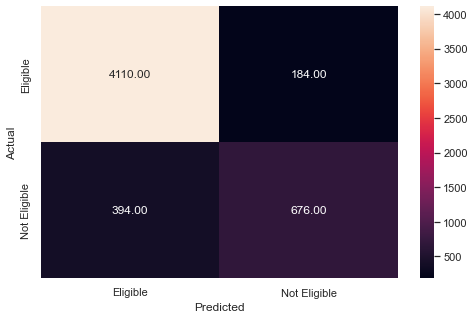

In [78]:
#Predict for train set
y_pred_train = lg.predict(scaled_X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       477
           1       0.78      0.62      0.69       119

    accuracy                           0.89       596
   macro avg       0.84      0.79      0.81       596
weighted avg       0.88      0.89      0.88       596



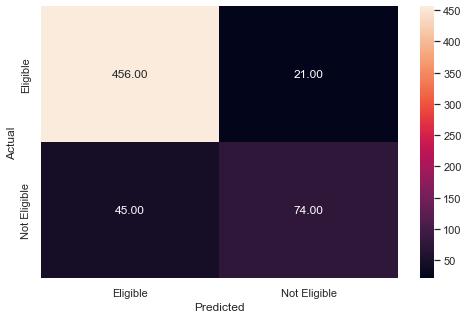

In [79]:
#Predict for test set
y_pred_test=lg.predict(scaled_X_test)

#checking the performance on the test dataset
metrics_score(y_test,y_pred_test)

**Observations:**

1. The model is performing **poorly on both train and test data**.
2. On the train set, the model achieved a recall score of 64%, which dropped down to 59% on the test data, and the precision came down from 80% on the train data to 76% on the test data.
3. As the model performance is similar for both train and test data, the logistic regression model is **not overfitting** and is giving a generalized performance. However, the performance is poor.
4. Let's experiment now and see if we can achieve improved performance.


#### Let's see if a change in train test split can improve the model performance.

In [79]:
# Splitting the data into train and test sets
#stratify=target variable - keeps the proportion of target variable same in both trng and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify=y)

#### Let us scale the data before fitting the model. After all, logistic regression is a gradient descent based algorithm !

In [80]:
# Scaling the data

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


In [81]:
# Fitting the model on the training data 
lg.fit(scaled_X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3340
           1       0.80      0.65      0.71       832

    accuracy                           0.90      4172
   macro avg       0.86      0.80      0.83      4172
weighted avg       0.89      0.90      0.89      4172



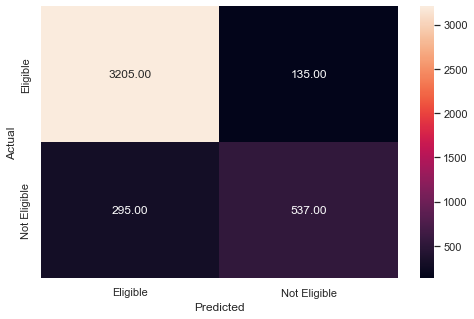

In [82]:
#Predict for train set
y_pred_train = lg.predict(scaled_X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1431
           1       0.77      0.60      0.68       357

    accuracy                           0.89      1788
   macro avg       0.84      0.78      0.80      1788
weighted avg       0.88      0.89      0.88      1788



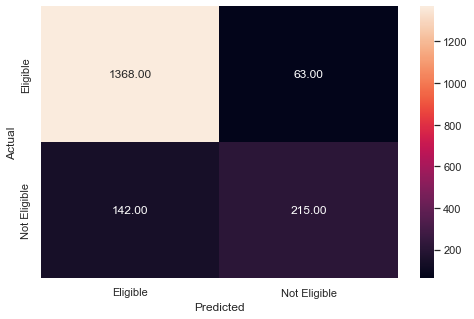

In [83]:
#Predict for test set
y_pred_test=lg.predict(scaled_X_test)

#checking the performance on the test dataset
metrics_score(y_test,y_pred_test)

**Observations:**

1. The model is giving a **generalized poor performance** for both train and test data, with a recall of 64% on training set and 60% on testing data. Precision score is slightly better with 80% for training set and 77% for testing set.
2. The model performance on the train as well as test data, is similar for both 70:30 split and 80:20 split (former being marginally better), as the recall scores stand at 59% vs 60% and precision is at - 76% vs 77% (respectively).
3. The model is performing poorly for both splits. But, **70:30 is marginally better**, so let's experiment with it further.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [84]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)


0
DEBTINC_missing_values_flag  1.090499
DELINQ                       0.877914
DEBTINC                      0.727241
VALUE_missing_values_flag    0.691129
CLNO_missing_values_flag     0.541730
DEROG                        0.442095
CLAGE_missing_values_flag    0.241424
NINQ                         0.240140
JOB_Sales                    0.176372
MORTDUE_missing_values_flag  0.138590
EQUITY_BUILT                 0.133514
JOB_Self                     0.092534
REASON_HomeImp               0.067724
JOB_Other                    0.041425
NINQ_missing_values_flag     0.019253
REASON_missing_values_flag  -0.048500
YOJ                         -0.057847
JOB_ProfExe                 -0.097232
YOJ_missing_values_flag     -0.126865
CLNO                        -0.148758
LOAN                        -0.156809
DELINQ_missing_values_flag  -0.218300
JOB_Office                  -0.288954
CLAGE                       -0.491251
JOB_missing_values_flag     -0.550298
DEROG_missing_values_flag   -0.671705

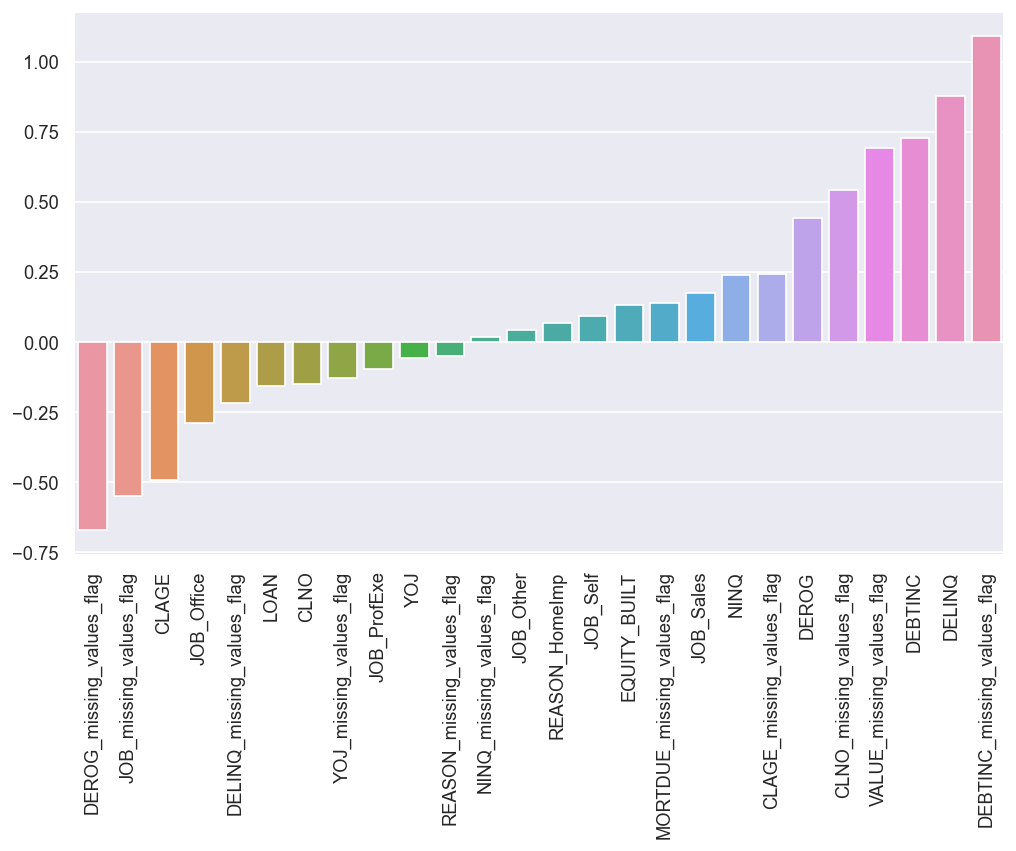

In [85]:
# Let us now create a visualization of the coefficients by using a barplot of their values. 
coefs = pd.Series(index=X.columns,data=lg.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6),dpi=120)
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90);


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [86]:
# Finding the odds
odds = np.exp(lg.coef_[0]) 

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

odds
DEBTINC_missing_values_flag  2.975759
DELINQ                       2.405875
DEBTINC                      2.069362
VALUE_missing_values_flag    1.995968
CLNO_missing_values_flag     1.718978
DEROG                        1.555964
CLAGE_missing_values_flag    1.273061
NINQ                         1.271428
JOB_Sales                    1.192882
MORTDUE_missing_values_flag  1.148653
EQUITY_BUILT                 1.142838
JOB_Self                     1.096950
REASON_HomeImp               1.070069
JOB_Other                    1.042295
NINQ_missing_values_flag     1.019440
REASON_missing_values_flag   0.952657
YOJ                          0.943794
JOB_ProfExe                  0.907345
YOJ_missing_values_flag      0.880853
CLNO                         0.861778
LOAN                         0.854867
DELINQ_missing_values_flag   0.803885
JOB_Office                   0.749047
CLAGE                        0.611860
JOB_missing_values_flag      0.576778
DEROG_missing_values_flag    0.510837

**Observations:**

- The odds of a client with missing DebtInc value to default are **~3 times** more than clients with DebtInc ratio available/filled. It suggests that the data might be missing values on purpose and the DebtInc ratio of defaulting clients have not been recorded.
- The odds of delinquent borrowers to default are **2.39 times** more than non-delinquent borrowers.
- The odds of clients with high DebtInc ratio defaulting are **1.99 times** more than employees whose DebtInc ratio is lower.
- The odds of a client with missing property's value to default are **~2.07 times** more than clients having it filled, indicating that the data is  not missing at random.
- The odds of clients missing the count of existing credit lines defaulting are **~2 times** more than clients with corresponding values available.
- The odds of a client with the number of derogatory reports as 1 or more defaulting are **~1.7 times** the clients with none derogatory reports raised against them.
- Similarly, if the DEROG field is na, there is half the chance of default. Presumably, if it is not recorded, it is probably 'Nil'. 
- Also, if the JOB field is na, there is half the chance of default. 
- Similarly, if CLAGE is high, odds of default are **0.6 times** those with low CLAGE values.
- The odds of loan repayment is 75% if the Job is 'Office' related.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

**The Precision-Recall Curve for Logistic Regression**

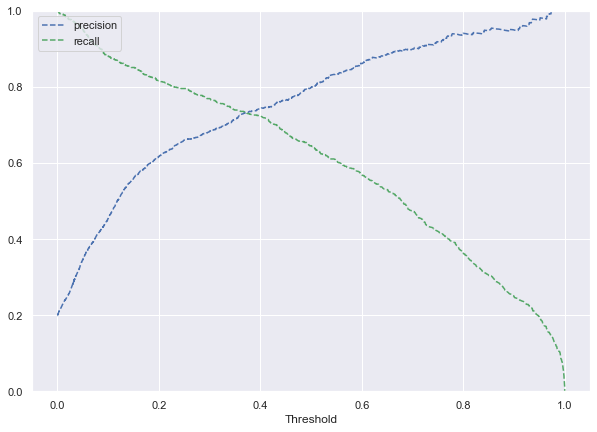

In [87]:
# predict_proba gives the probability of each observation belonging to each class
# Let us use 70:30 split because it performed better
y_scores_lg = lg.predict_proba(scaled_X_train) 

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**

- We can see that the precision and the recall are balanced for a threshold of about **0.37**.

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3340
           1       0.73      0.73      0.73       832

    accuracy                           0.89      4172
   macro avg       0.83      0.83      0.83      4172
weighted avg       0.89      0.89      0.89      4172



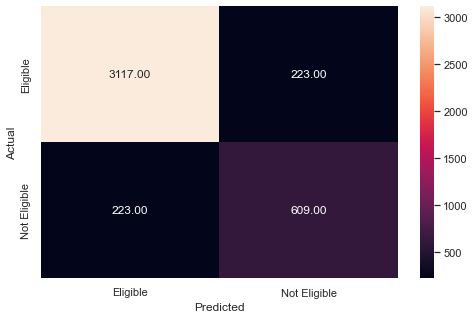

In [88]:
optimal_threshold1 = 0.37

y_pred_train = lg.predict_proba(scaled_X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observations:**

- **The model performance has improved. The recall has increased for class 1 from 64% to 73%**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1431
           1       0.70      0.70      0.70       357

    accuracy                           0.88      1788
   macro avg       0.81      0.81      0.81      1788
weighted avg       0.88      0.88      0.88      1788



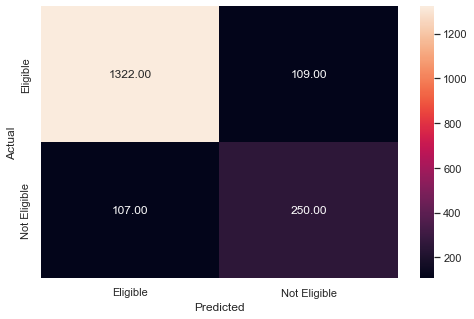

In [89]:
optimal_threshold1 = .37

y_pred_test = lg.predict_proba(scaled_X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**


- The model is giving a **similar performance on the test and the train datasets**, i.e., the model is giving a generalized performance.  

- The 70:30 split gave a marginally better performance than the 80:20 split, and hence we shall use the 70:30 split to assess model performance, hereon.  

- When we adjusted the model thresholds, it was observed that:  

        (a) At a threshold of 0.20, the model recall score for test data stood at 80%, but the precision score dropped to 59%, i.e. the model had too many false positives.
    
        (b) At a threshold of 0.70, the model precision score for test data reaached 90%, but the recall score dropped to 44%, i.e. too many false negatives.
    
        (c) At the optimum threshold of 0.37 obtained through precision recall curve, both precision and recall scores for test data stood at 70%, which depicts a moderate amount of false positives and false negatives ( 30%).
   
- Generally speaking, at thresholds below 0.50, the recall score improved but the precision scores came down. On the other hand, at threshold above 0.50, precision scores improved with a drop in recall scores. At the **optimal threshold of 0.37**, both **precision and recall** scores were **balanced** and hence, accuracy was comapritively higher.

- The logistic regression model with **70:30 split** and a **threshold of ~0.37** was the **best performing** model amongst all variants of LR.

- The average recall and precision for the model are good but let's see if we can get an even better performance using other algorithms. 


### **Build a Decision Tree Model**

**Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not?

   - All the tree based algorithms are robust to outliers as they split the data points on the basis of same value and so, the value of outlier doesn't affect the split that much.

   - Further, tree based models do not need to scale features, because at each node, the values on the left and right get scaled by the same factor .

#### Data Preparation for the tree based model

#### Separating the target variable y and independent variable x

In [90]:
# Create dummy variables for the categorical variables - 
X = pd.get_dummies(df_new,columns=['JOB','REASON'],drop_first=True)

# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = X.drop(['BAD'],axis=1)

# Create y(dependent variable)
y = df_new['BAD']


#### Split the data

In [91]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [92]:
# Defining Decision tree model with class weights - class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

In [93]:
#fitting Decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3340
         1.0       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



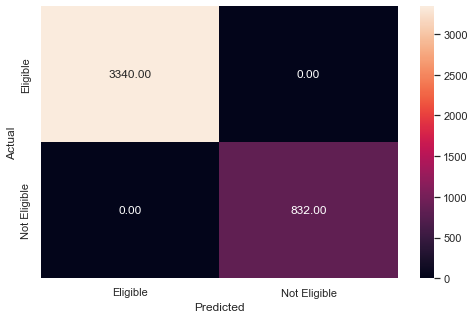

In [94]:
# Checking performance on the training data
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1431
         1.0       0.86      0.84      0.85       357

    accuracy                           0.94      1788
   macro avg       0.91      0.90      0.91      1788
weighted avg       0.94      0.94      0.94      1788



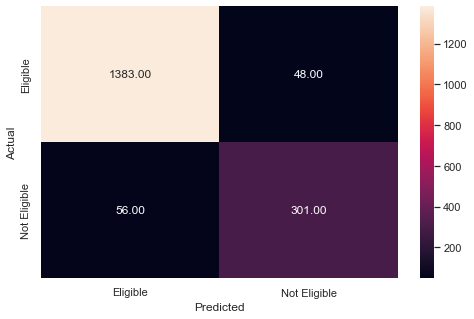

In [95]:
# Checking performance on the testing data
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Let's plot the feature importance and check the most important features.**

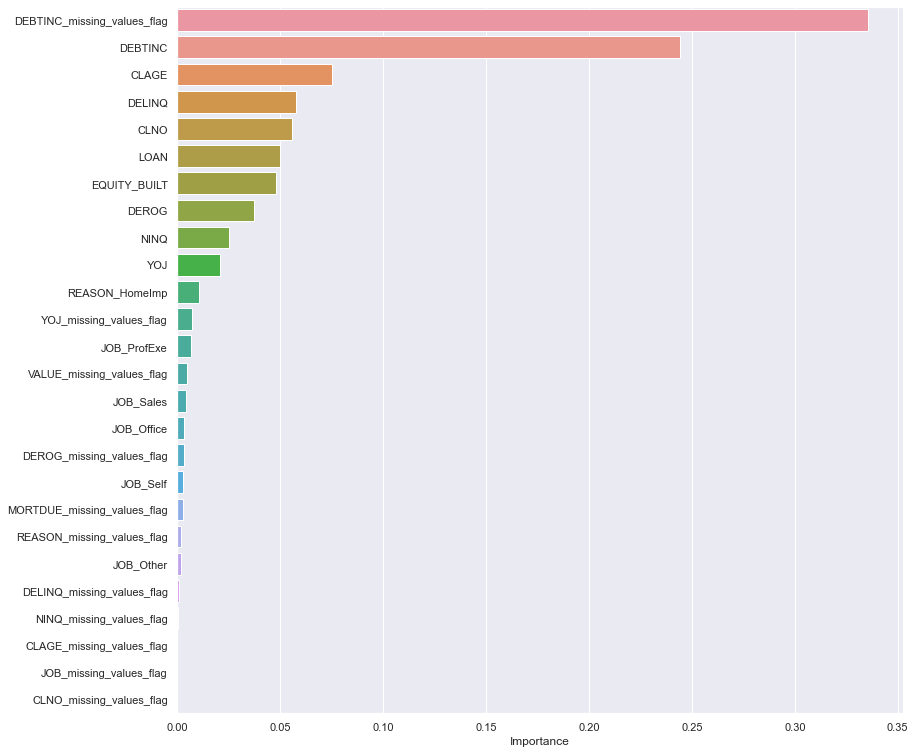

In [96]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index);

**Observations**

* According to the decision tree model, **DebtInc-missing-value-flag** is the most important indicator of default, followed by **Debt to Income ratio, number of existing credit lines, age of oldest existing credit line**.

* This might signify that people who are likely to default have missing DebtInc field or have higher debt to income ratio, have greater number of credit lines and very old of them already existing.

* Other important features are Mortdue, Delinq, Derog, Loan ,Value, NINQ, YOJ etc.

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


#### Using GridSearchCV for Hyperparameter tuning on the model

In [97]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25, 50, 75, 100]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=50, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      3340
         1.0       0.73      0.82      0.77       832

    accuracy                           0.90      4172
   macro avg       0.84      0.87      0.86      4172
weighted avg       0.91      0.90      0.91      4172



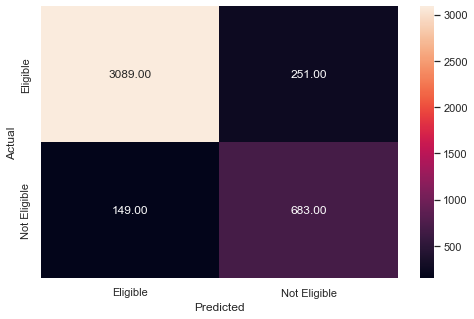

In [98]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      1431
         1.0       0.72      0.80      0.76       357

    accuracy                           0.90      1788
   macro avg       0.83      0.86      0.85      1788
weighted avg       0.90      0.90      0.90      1788



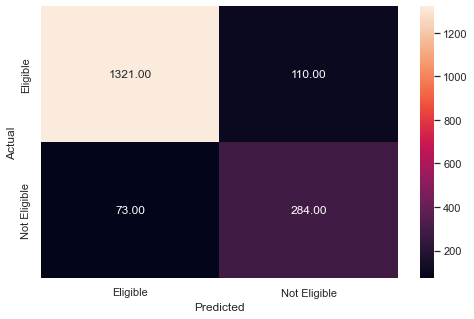

In [99]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Insights**

- The model is giving a similar performance on both train and test data, and hence has a **generalised performance and is not overfitting**.
                                                                  
- We experimented with different set of hypermeters and used two variants of the original dataset.
                                                 
    (a)  Basic median/mode imputed                    
    (b)  Mice imputed                                         
    
- Further, different parameters were keyed-in during Hyperparameter training for GridSearchCV and following observations were made:
                                                               
    (a) The performance of both the models was better for mice imputed models. This re-affirms that the **mice imputations generate better quality data which in turn result in improved model performance**. For this model, hyperparameter tuning led to following takeaways:
                                                            
        (i) For a max_depth=5 and min samples per leaf=25, the model achieved a recall score of 76%  and a precision of 61% on the test data.
                                                                 
        (ii) For a max_depth=6 and min samples per leaf=50, the model achieved a recall score of 82% and a precision of 74% on the test data with an overall accuracy of 91%, which is the best performance for the models seen so far. 
    

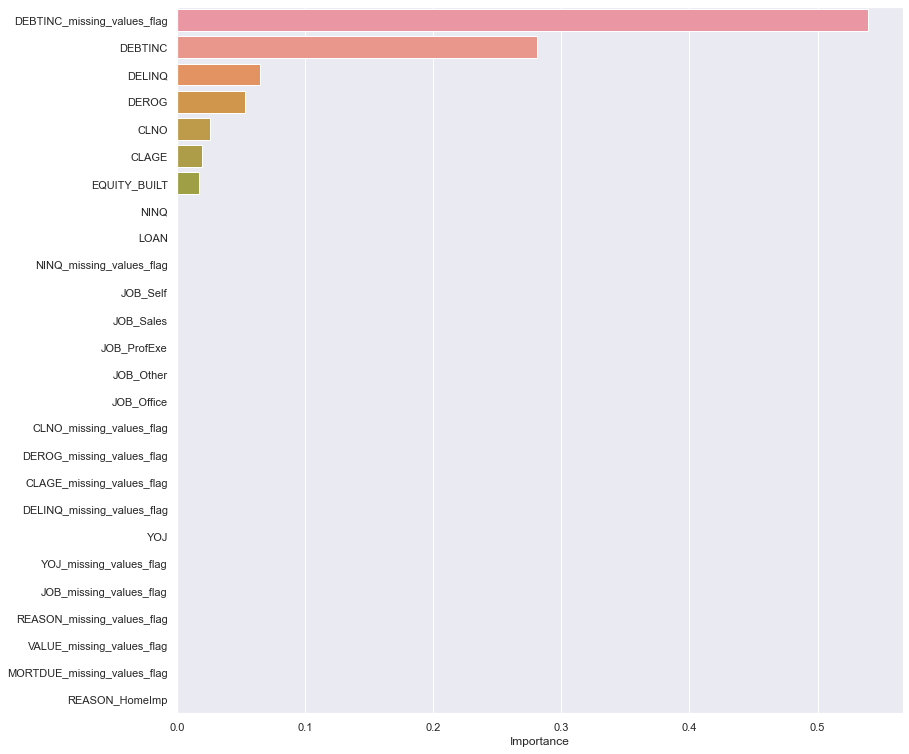

In [100]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index);

**Observations:**

- After model tuning, only 8 features seem to be important (compared with 20 imp features seen earlier). It seems like the model has simplified the problem quite a bit.

- However, upon tuning, model performance is generalized (and no longer overfitting like earlier), and the Recall is 82%, Precision is 74%, and F-1 score stands at 78%, which is decent.

- According to the tuned decision tree model, **DebtInc-missing-value-flag** is the most important indicator of default, followed by **Debt to Income ratio, number of delinquency reports, number of derogatory reports, number of existing credit lines, age of oldest existing credit line, years on current job and mortgage amount due**.

- This might signify that people who are **likely to default** have **missing DebtInc field or have higher debt to income ratio, have had delinqunecis and/or derogatory reports raised in the past, have greater number of credit lines and very old of them still existing**.


#### Plotting the Decision Tree

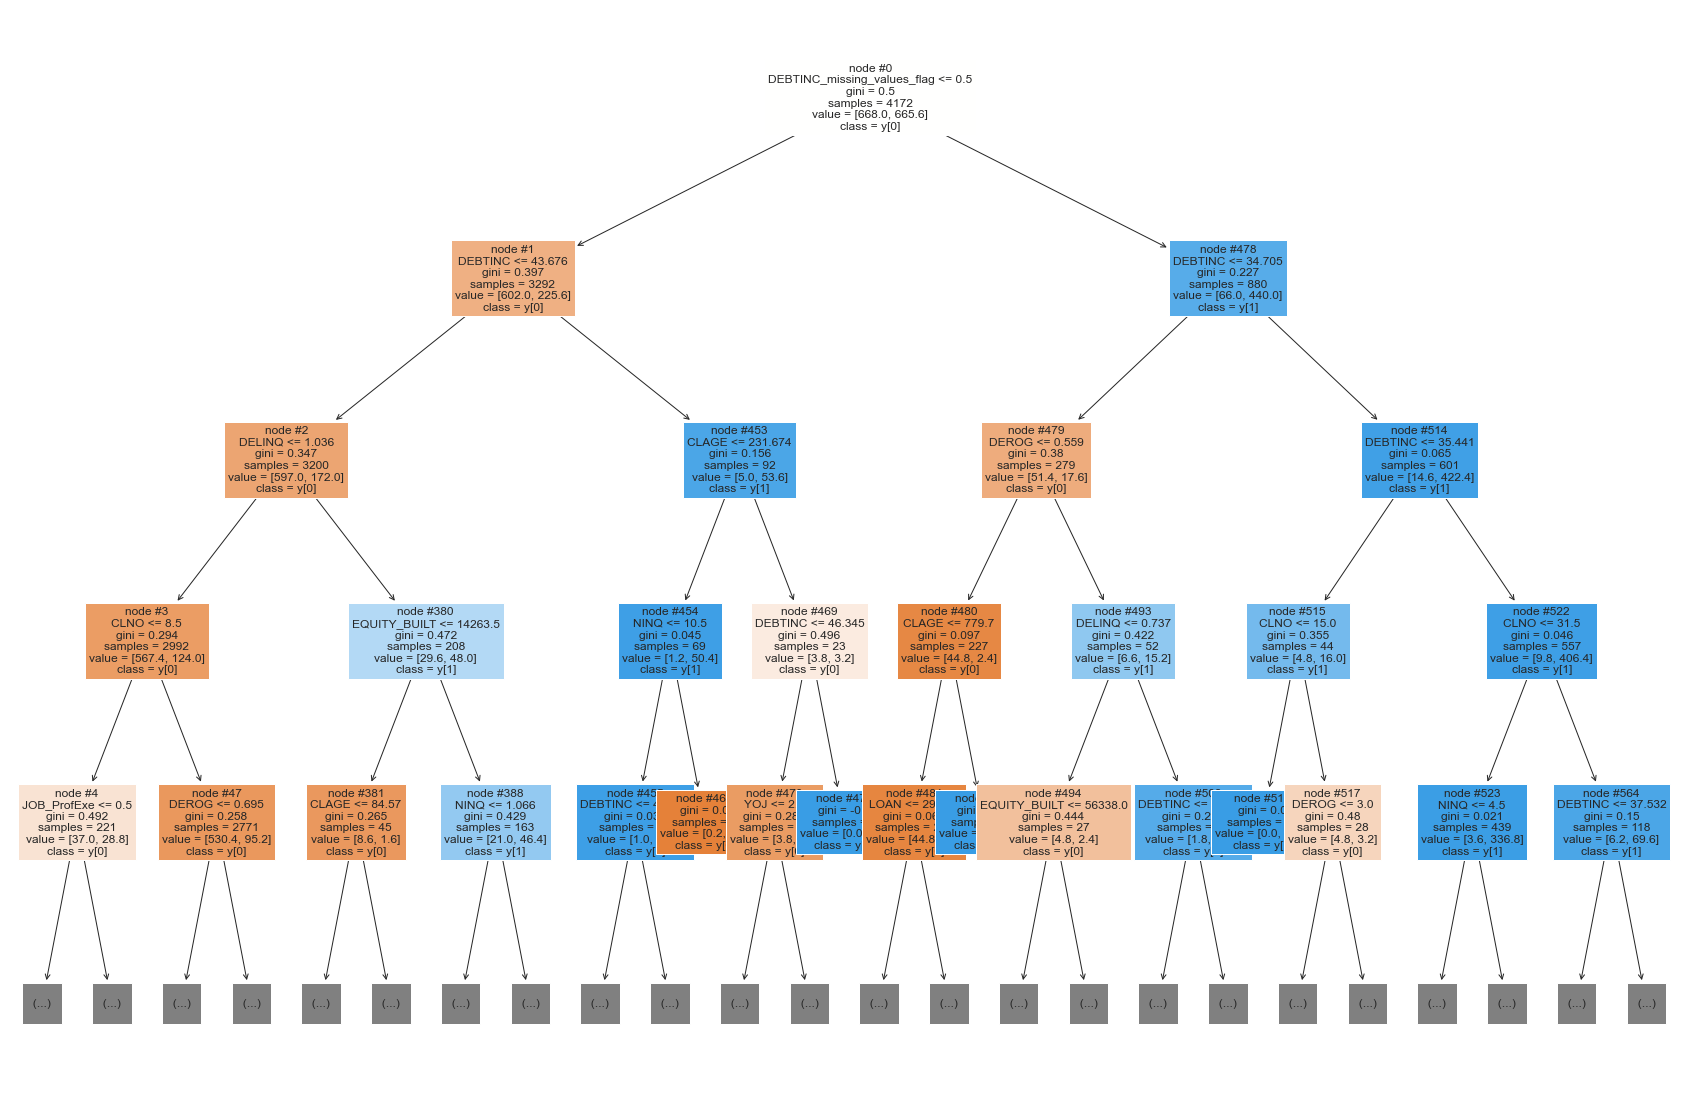

In [101]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

#### Deducing the business rules apparent from the Decision Tree:

**Note:**

Blue leaves represent the default(bad loan), i.e., **y[1]** and the orange leaves represent the non-default(good loan), i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Insights**

- Clients having **DebtInc ratio less than 43.7 are good borrowers**, in general, which is expected as lower values of DebtInc ratio indicate that the **current income of the client can easily payoff debts without putting strain on the household expenses**. If the number of delinquency reports generated for such clients in past is 1 or less, the chances of default decrease even further. If the number of existing credit lines for such customer are 8 or less, it becomes more certain that we have a good client in our bag, who should be granted the HMEQ loan.
-  In general, if we **satisy the conditions on four variables as follows**- 
                    
    (a) DebtInc ratio less than 43.6             
    (b) 1 or less delinquencies in past              
    (c) 8 or less active credit lines     
    (d) Nil derogatory reports in past            
     We can predict with a very **high probability that the client we are dealing with, is going to sincerely repay our loan**. The probability keeps on increasing as more and more consitions get satisfied in a row, which makes sense.
- For clients missing DebtInc ratio, the nodes splitting on the basis of DebtInc at the right side of the tree are essentially making predictions on the basis of imputated values.
- If the DebtInc ratio of the client is not recorded and the amount due on the existing mortgage is less than 188.5k dollars, there is a fairly high chance that he will default.
- However, if the **DebtInc ratio is unobserved but nil derogatory reports have been filed in the past, chances of default for such clients are low**. 
- The **chances of default for a client missing DebtInc and no derog reports decrease even further if the client is running a credit line for not more than 65 years**. *Frankly speaking, who runs a credit for more than 65 years ?? It is even more than the average life expectancy ! Unless you are defaulting and unable to repay*. **-_-** 
- DebtInc ratio can be seen as a very clear indicator of default. If the DebtInc ratio is more than 43.7, the chances of default increase, as expected. If the age of oldest credit line running for such clients is ~19 years or less and the number of enquiries are 10 or less, we should abstain from approving loans of such customers as the chances of default are high.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [102]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(random_state = 42)

# Fitting the Random Forest classifier on the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3340
         1.0       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



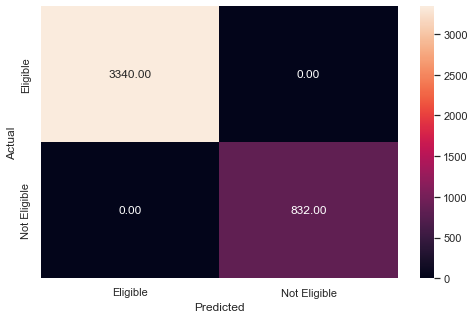

In [103]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1431
         1.0       0.98      0.82      0.89       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.93      1788
weighted avg       0.96      0.96      0.96      1788



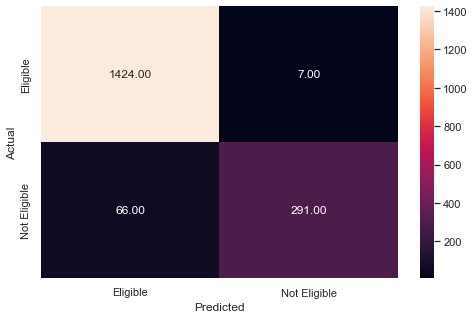

In [104]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The random forest model is fitting perfectly on the training data and not so well on the test data, i.e. it has learnt the entire training data and is **overfitting**.
- However, the performance on the test data is very good with a recall score of 82% and a precision of 98%. 
- Let's see if removing data imbalance improves model performance.

### **Build a Random Forest model with Class Weights**

In [105]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator_weighted = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

# Fitting Random Forest model
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3340
         1.0       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



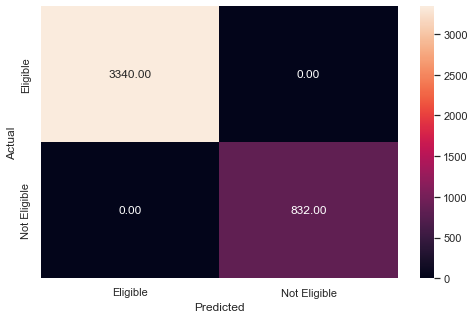

In [106]:
# Checking performance on the train data
y_pred_train_rf = rf_estimator_weighted.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1431
         1.0       0.98      0.80      0.88       357

    accuracy                           0.96      1788
   macro avg       0.97      0.90      0.93      1788
weighted avg       0.96      0.96      0.96      1788



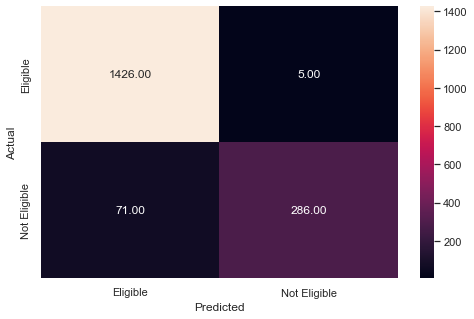

In [107]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator_weighted.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The random forest model with class weights is fitting perfectly on the training data and not so well on the test data, i.e. it has learnt the entire training data and is **overfitting**.
- However, the **performance on the test data has declined in comparison to the previous unweighted model**. The recall score has dropped ot 78% from 82% and a precision of 98%. Adding class weights is expected to charge penalty for incorrect prediction for minority classes, which is thus evident here.
- Let's check feature importances now to get a better understanding.

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

**Let's check the feature importance of the Random Forest**

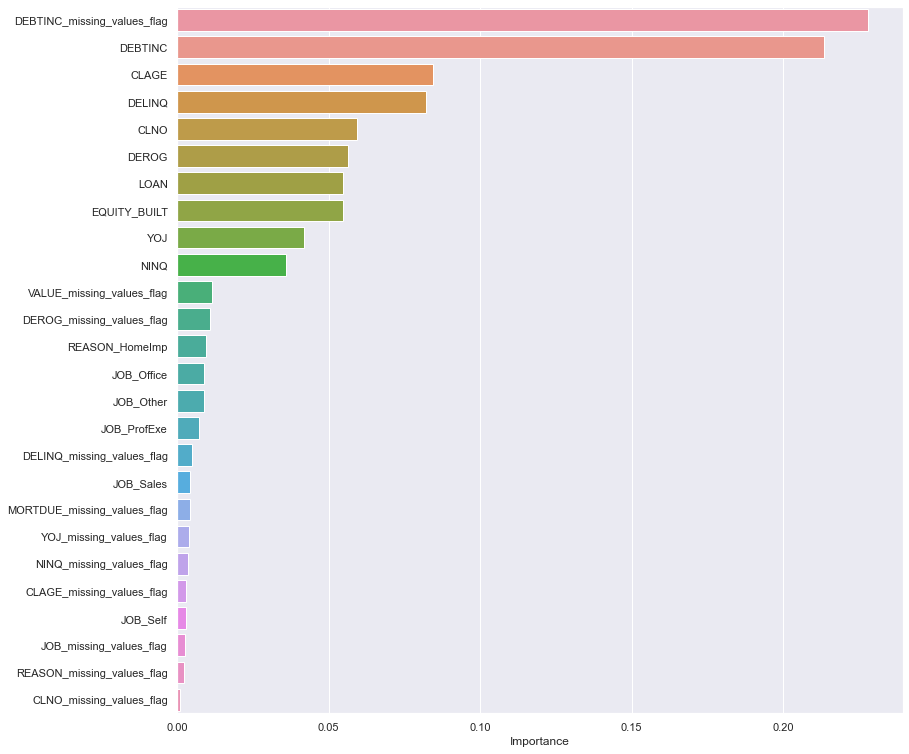

In [108]:
importances = rf_estimator_weighted.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index);

**Observations:**

- From the feature importances, it becomes further clear that our weighted random forest model is overfitting.
- On comparing the results with that of the tuned decision tree model, it can be seen that **8 important features are in common** between both models: 

    (a) DebtInc-missing-value-flag                                        
    (b) DebtInc ratio                                           
    (c) age of oldest existing credit line                               
    (d) Number of delinquency reports                               
    (e) mortgage amount due                                            
    (f) number of existing credit lines                                   
    (g) number of derogatory reports                                          
    (h) years on current job                                           
- However, random forest finds a few other features as important, than the ones found to be in common, as follows:    

    (a) Current value of the property                              
    (b) Amount of loan sought by borrower                                       
    (c) Number of recent credit enquiries
    

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value reduces the loss of our model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.


#### **Warning:** This may take a long time depending on the parameters you tune. 

In [109]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [50, 100, 250, 500],
        "min_samples_leaf": np.arange(1, 6, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

# Fit the grid search on the train set
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=5,
                       random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3340
         1.0       0.96      0.94      0.95       832

    accuracy                           0.98      4172
   macro avg       0.97      0.96      0.97      4172
weighted avg       0.98      0.98      0.98      4172



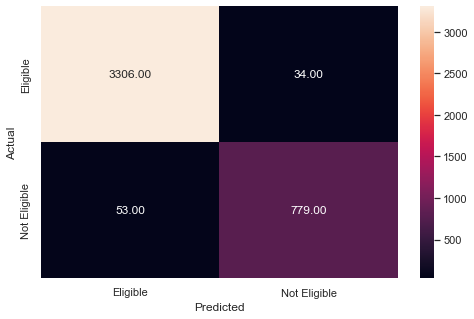

In [110]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1431
         1.0       0.90      0.82      0.86       357

    accuracy                           0.95      1788
   macro avg       0.93      0.90      0.91      1788
weighted avg       0.95      0.95      0.95      1788



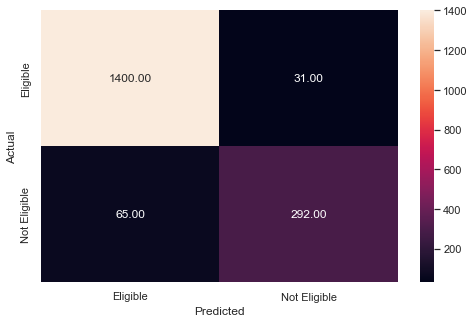

In [111]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

#### Plot the Feature importance of the tuned Random Forest

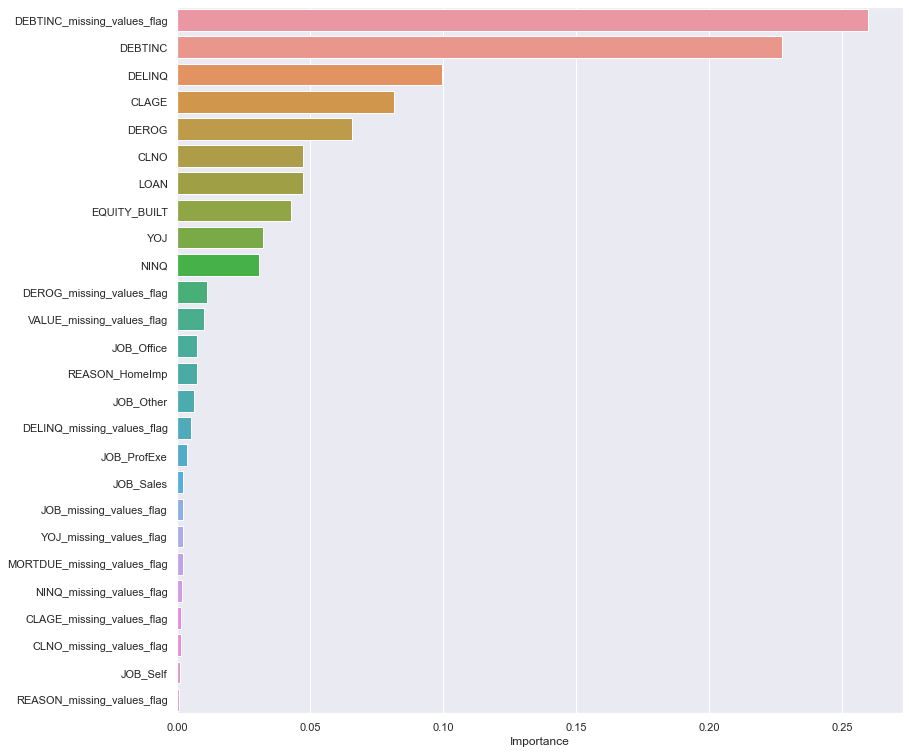

In [112]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index);

**Insights**

* Tuned Random Forest finds that around 15 features are significant in their importance.
* Further, as **Tuned Decision Tree and Tuned Random Forest** have been our **best performing models** so far, the **common feature importances** in order of their importances **amongst both** were :                           
    (a) DebtInc-missing-value-flag                                                                              
    (b) DebtInc ratio                                                                                         
    (c) Number of delinquency reports                                         
    (d) number of derogatory reports                                       
    (e) age of oldest existing credit line                                  
    (f) number of existing credit lines                           
    (g) mortgage amount due                                                          


### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [113]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [114]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [115]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [116]:
# Make the list of all the model names 
models = [lg,dt,dtree_estimator,rf_estimator,rf_estimator_weighted,rf_estimator_tuned]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [117]:
# Mentioning the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Tuned Decision Tree','Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                 'Test_Recall': recall_test,
                                 'Train_Recall': recall_train,
                                'Test_Precision': precision_test,        
                                 'Train_Precision': precision_train,
                                'Test_Precision': precision_test,  
                                 'Test_Accuracy': acc_test,
                                          'Train_Accuracy': acc_train,
                                          }) 
comparison_frame

Model  Test_Recall  Train_Recall  Test_Precision  \
0     Logistic Regression     0.770308      0.789663        0.213841   
1           Decision Tree     0.843137      1.000000        0.862464   
2     Tuned Decision Tree     0.795518      0.820913        0.720812   
3           Random Forest     0.815126      1.000000        0.976510   
4  Weighted Random Forest     0.801120      1.000000        0.982818   
5     Tuned Random Forest     0.817927      0.936298        0.904025   

   Train_Precision  Test_Accuracy  Train_Accuracy  
0         0.215128       0.388702        0.383509  
1         1.000000       0.941834        1.000000  
2         0.731263       0.897651        0.904123  
3         1.000000       0.959172        1.000000  
4         1.000000       0.957494        1.000000  
5         0.958180       0.946309        0.979147

**Insights:**

- As discussed above, the most important metric w.r.t our conservative approach of saving the bank/lender from financial losses in case of a default is **Recall**, followed by Precision and overall Accuracy.
- We can see that the
        (a) Although the winner for recall score on test data is Logistic Regression by scoring 93.8%, the precision score on test data is merely 20% - i.e. too many false positives, which will end up rejecting too many eligible borrowers- Interest on loans is a major source of bank's income - It is lost due to wrong predictions by our model. Hence, this model does more harm to business than good.
        (b) Next, we may think that the trophy for the best performing model goes to Tuned Random Forest model with a recall score of 84% on the test data, a precision score of 91.5% on the train data, and an accuracy of 94.4%, which is pretty good. But wait, can this model explain the reason of rejections to the furious borrowers who charge at the Bank stating violation of Equal Credit Opportunity Act's guidelines ? Sadly, the answer is NO! Because random forest is a bagging algorithm which is weak on interpretability. 
        (c) We then move on to Decision Tree in search of the true winner as it has achieved the next best recall score of 82.6%, but alas, the model is overfitting on the training data ! Who comes next is Random Forest with a recall score of 82.3% on the test data, but, for the love of the God, this model is also overfitting. This is getting really intense now !
        (d) Finally, we find that the Tuned Decision Tree is the best performing model for our use case with a recall score of 81.8% on the test data, a precision of 74.1% and manages to achieve an accuracy of 90.6%. Our search has finally come to an end ! Hurray ! :D :)
            (e) The Tuned Decision Tree model:
                   (i) Correctly predicts ~82 out of 100 defaulters and misses out on 18, which is a pretty good score. Nobody is perfect right ? :) 
                   (ii) Further, the precision score indicates that out of the 100 applicants that it predicts are defaulters, 26 are, in fact, eligible for loan, which is a missed opportunity for sure. Notwithstanding, it is way better than giving loan to ineligible applicants and then wasting more resources, more time and more money on chasing them for repayments- all in vain, later on.
 

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

1. **Values are not missing from the data just at random**. There is a relationship emerging between the missing-attributes of a client and the possibility of default. It has been observed that:

		(i) 	The odds of a client missing DebtInc value to default are ~3 times more than clients with DebtInc ratio filled.
		(ii)	The odds of a client missing property's value to default are ~2.07 times more than clients having it filled.
		(iii) 	The odds of clients missing the count of existing credit lines defaulting are ~2 times more than clients with corresponding values filled. 
		(iv) 	It clearly indicates that the data might be missing values on purpose.

2. **Data imbalance**- loan default occurs in ~20% cases, i.e. target classes are imbalanced.  However, we have established that granting loan to a defaulter is a greater loss for bank as it eats up on the bank’s profit margins and leads to wastage of resources and time which could have been utilized elsewhere to generate revenue. False Negatives/recall assume greater importance and have to be minimized.

3. Following relationships emerged amongst different independent variables in terms of odds of occurrences :		

		(i) 	The odds of clients with high DebtInc ratio defaulting are 1.99 times more than employees whose DebtInc ratio is lower.
 		
		(ii) 	The odds of delinquent borrowers to default are 2.39 times more than non-delinquent borrowers.

 		(iii) 	The odds of a client with the number of derogatory reports as 1 or more defaulting are ~1.7 times the clients with none derogatory reports raised against them.

4. There is a very high chance that by following the decision rules, correct predictions can be made:

		(i) 	Clients having DebtInc ratio less than 43.7 are good borrowers, in general, which is expected as lower values of DebtInc ratio indicate that the current income of the client can easily payoff debts without putting strain on the household expenses. If the number of delinquency reports generated for such clients in past is 1 or less, the chances of default decrease even further. If the number of existing credit lines for such customer are 8 or less, it becomes more certain that we have a good client in our bag, who should be granted the HMEQ loan.

		(ii) 	In general, if we satisfy the conditions on four variables as follows-
			(a) 	DebtInc ratio less than 43.6%			
            (b) 	1 or less delinquencies in past			
            (c) 	8 or less active credit lines			
            (d) 	Nil derogatory reports in past
We can predict with a very high probability that the client we are 	dealing with, is going to sincerely repay our loan. The probability keeps on increasing as more and more conditions get satisfied in a row.

		(iii)     If the DebtInc ratio of the client is not recorded and the amount due on the existing mortgage is less than 188.5k dollars, there is a fairly high chance that he will default. However, if the DebtInc ratio is unobserved but nil derogatory reports have been filed in the past, chances of default for such clients are low. The chances of default for a client missing DebtInc and no derog reports decrease even further if the client is running a credit line for not more than 65 years. Frankly speaking, who runs a credit for more than 65 years ?? It is even more than the average life expectancy ! Unless you are defaulting and unable to repay. -_-

		(iv)     DebtInc ratio can be seen as a very clear indicator of default. If the DebtInc ratio is more than 43.7, the chances of default increase, as expected. If the age of oldest credit line running for such clients is ~19 years or less and the number of enquiries are 10 or less, we should abstain from approving loans of such customers as the chances of default are high.



**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**1. Technique comparison**

(a) 	**Logistic Regression**
		
 		(i) 	Starting with the baseline model, logistic regression was able to achieve a recall score of 77% on the test data. However, the precision scores obtained were very poor and stood at 20%, meaning that false positives were generated 80% of times.  The accuracy, as expected was at 36.8%. The model gives a similar performance on the test and the train datasets, i.e., the model is giving a generalized performance. The model with 70:30 split and a threshold of ~0.37 was the best performing model amongst all variants of LR.

		(ii) 	Generally speaking, at thresholds below 0.50, the recall score improved but the precision scores came down. On the other hand, at threshold above 0.50, precision scores improved with a drop in recall scores. At the optimal threshold of 0.37, both precision and recall scores were balanced (both stood at 70% on the test data), which depicts a moderate amount of false positives and false negatives ( 30%) and hence, accuracy was comparatively higher.

(b) 	**Decision Trees**

		(a) The Decision Tree is performing perfectly on the training data but it's performance degrades on the test data., i.e. the DT model is overfitting. We checked the performance of decision tree model on two variants of the original dataset. The outliers were left untreated for both variants as they can handle outliers.
			(i) 	Imputation of missing values with the median/mode. This model performed even poorly than our baseline logistic regression classifier, with a recall score of 62% on the test data, i.e. it failed to identify 38% defaulters, which can lead to heavy losses for the banking business/lenders. Upon hyperparameter tuning, the recall score improved to 76% , however, the precision score dropped to 61% from 69%.
			(ii) 	Imputation of missing values using MICE algorithm. This model performed well on the test data with a recall score of 83%, precision score of 87% and an accuracy of 94%, however, the model is overfitting.

        (b) 	We experimented with different set of hyper parameters for tuning using GridSearchCV and used two variants of the original dataset and following observations were made: 
(i) 	Best performance was obtained for a max_depth=6 and min samples per leaf=50, the model achieved a recall score of 82% and a precision of 74% on the test data with an overall accuracy of 91%, which is a decent score.

        (c) **Random Forest**		
		
            (i) 	Initially, the RF model was overfitting on the training data like the DTs. However, the tuned random forest model gave a generalised (similar) performance for both train and test data. It is a bagging technique and can also handle outliers. However, it is NOT interpretable like DTs.
		
            (ii) 	The TRF is the winner amongst all other algorithms (LR,DT,RF) that we trained our data on, with a recall score of 84% and a precision score of 96%. The overall model accuracy stands at 96%. It means that out of 100 defaulters, our model will be able to predict 84 of them in advance and will save monetory losses/ resource wastage. However, it will miss out on the 16% lot that will successfully fool our model!

**2. Scope of improvement**

	(a)  	In milestone 1, we saw that MORTDUE and VALUE are highly correlated. Following improvements could be made to the existing model.

		(i) 	In order to get rid of multicollinearity, we can create a new feature as follows:
			Equity built = Current value of property - Mortgage due

		(ii) 	Usage of new feature built using linear combination of existing features is supposed to improve model performance. It is to be noted that, it is very intuitive, as the  amount of home equity loan approved is directly related to the amount of equity built on the existing property.

	(b) 	Further, the model can utilize its full potential and produce much more dependable results if there is NO missing data. After all, the most critical role in model deployment is played by the amount and quality of data.

	(c) 	More data in terms of new attributes like - Gross income of the individual, number of dependent family members, gross income of the household,  job details etc can further help in developing an accurate model. These attributes and/or their linear combinations could act as strong predictors and help us understand the underlying factors of default.
    (d) 	More state-of-the-art algorithms like XGBoost, SVM, Gradient boost etc can further be used for better performance.


**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

 Final Solution Design

	(a) 	Both Decision Trees and Random Forests generated good results but the model was initially overfitting. Upon performing hyper parameter tuning on the model using GridSearchCV, the problem of overfitting was resolved and the models produced generalized results.

	(b) 	On the basis of performance metrics described above, it can be seen that the Tuned Random Forest model was the best. However, Tuned Decision Tree is the final proposed solution as interpretability is one of the most important requirements for our predictor model. Following explains why:-

		(i) 	 As it is critical to be able to explain the reason of rejections to the ineligible applicants.

		(ii) 	 As it also helps establish the rigorous implementation of  Equal Credit Opportunity Act's guidelines by explaining the factors which lead to rejection of loan application of a client.

	(c) 	However, a combination of multiple ML models can also be utilized for better results and understanding of the entire credit cycle, in general. The odds of occurrences, as observed through LR, the feature importances generated through DT/RF, and the performance 
 
